In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib

In [12]:
#загрузка датасетов композитных материалов
composite_df1 = pd.read_excel('X_bp.xlsx')
composite_df2 = pd.read_excel('X_nup.xlsx')

In [4]:
#Просмотр данных первого датасета
composite_df1

Unnamed: 0  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0              0                         1.857143       2030.000000   
1              1                         1.857143       2030.000000   
2              2                         1.857143       2030.000000   
3              3                         1.857143       2030.000000   
4              4                         2.771331       2030.000000   
...          ...                              ...               ...   
1018        1018                         2.271346       1952.087902   
1019        1019                         3.444022       2050.089171   
1020        1020                         3.280604       1972.372865   
1021        1021                         3.705351       2066.799773   
1022        1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1018             912.855545                    86.992183   
1019             444.732634                   145.981978   
1020             416.836524                   110.533477   
1021             741.475517                   141.397963   
1022             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1018                        20.123249                324.774576   
1019                        19.599769                254.215401   
1020                        23.957502                248.423047   
1021                        19.246945                275.779840   
1022                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1018                     209.198700                             73.090961   
1019                     350.660830                             72.920827   
1020                     740.142791                             74.734344   
1021                     641.468152                             74.042708   
1022                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  
0                       3000.000000               220.000000  
1                       3000.000000               220.000000  
2                       3000.000000               220.000000  
3                       3000.000000               220.000000  
4                       3000.000000               220.000000  
...                             ...                      ...  
1018                    2387.292495               125.007669  
1019                    2360.392784               117.730099  
1020                    2662.906040               236.606764  
1021                    2071.715856               197.126067  
1022     

In [5]:
#Просмотр данных второго датасета
composite_df2

Unnamed: 0  Угол нашивки, град  Шаг нашивки  Плотность нашивки
0              0                   0     4.000000          57.000000
1              1                   0     4.000000          60.000000
2              2                   0     4.000000          70.000000
3              3                   0     5.000000          47.000000
4              4                   0     5.000000          57.000000
...          ...                 ...          ...                ...
1035        1035                  90     8.088111          47.759177
1036        1036                  90     7.619138          66.931932
1037        1037                  90     9.800926          72.858286
1038        1038                  90    10.079859          65.519479
1039        1039                  90     9.021043          66.920143

[1040 rows x 4 columns]

In [6]:
#просмотр типов данных
print('Первый датасет: \n', composite_df1.dtypes)
print('Второй датасет: \n', composite_df2.dtypes)

Первый датасет: 
 Unnamed: 0                                int64
Соотношение матрица-наполнитель         float64
Плотность, кг/м3                        float64
модуль упругости, ГПа                   float64
Количество отвердителя, м.%             float64
Содержание эпоксидных групп,%_2         float64
Температура вспышки, С_2                float64
Поверхностная плотность, г/м2           float64
Модуль упругости при растяжении, ГПа    float64
Прочность при растяжении, МПа           float64
Потребление смолы, г/м2                 float64
dtype: object
Второй датасет: 
 Unnamed: 0              int64
Угол нашивки, град      int64
Шаг нашивки           float64
Плотность нашивки     float64
dtype: object


In [7]:
#объем двух датасетов
print('Первый датасет: \n', composite_df1.shape)
print('Второй датасет: \n', composite_df2.shape)

Первый датасет: 
 (1023, 11)
Второй датасет: 
 (1040, 4)


In [13]:
#присвоение индекса Unnamed в обоих датасетах
composite_df1 = composite_df1.rename(columns={'Unnamed: 0':'index'})
composite_df1.set_index('index', inplace=True)
composite_df1

Соотношение матрица-наполнитель  Плотность, кг/м3  \
index                                                      
0                             1.857143       2030.000000   
1                             1.857143       2030.000000   
2                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
...                                ...               ...   
1018                          2.271346       1952.087902   
1019                          3.444022       2050.089171   
1020                          3.280604       1972.372865   
1021                          3.705351       2066.799773   
1022                          3.808020       1890.413468   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
index                                                       
0                 738.736842                    30.000000   
1                 738.736842                    50.000000   
2                 738.736842                    49.900000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
...                      ...                          ...   
1018              912.855545                    86.992183   
1019              444.732634                   145.981978   
1020              416.836524                   110.533477   
1021              741.475517                   141.397963   
1022              417.316232                   129.183416   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
index                                                              
0                            22.267857                100.000000   
1                            23.750000                284.615385   
2                            33.000000                284.615385   
3                            21.250000                300.000000   
4                            22.267857                284.615385   
...                                ...                       ...   
1018                         20.123249                324.774576   
1019                         19.599769                254.215401   
1020                         23.957502                248.423047   
1021                         19.246945                275.779840   
1022                         27.474763                300.952708   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
index                                                                        
0                         210.000000                             70.000000   
1                         210.000000                             70.000000   
2                         210.000000                             70.000000   
3                         210.000000                             70.000000   
4                         210.000000                             70.000000   
...                              ...                                   ...   
1018                      209.198700                             73.090961   
1019                      350.660830                             72.920827   
1020                      740.142791                             74.734344   
1021                      641.468152                             74.042708   
1022                      758.747882                             74.309704   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  
index                                                          
0                        3000.000000               220.000000  
1                        3000.000000               220.000000  
2                        3000.000000               220.000000  
3                        3000.000000               220.000000  
4                        3000.000000               220.000000  
...                              ...                      ...  
1018                

In [14]:
composite_df2 = composite_df2.rename(columns={'Unnamed: 0':'index'})
composite_df2.set_index('index', inplace=True)
composite_df2

Угол нашивки, град  Шаг нашивки  Плотность нашивки
index                                                    
0                       0     4.000000          57.000000
1                       0     4.000000          60.000000
2                       0     4.000000          70.000000
3                       0     5.000000          47.000000
4                       0     5.000000          57.000000
...                   ...          ...                ...
1035                   90     8.088111          47.759177
1036                   90     7.619138          66.931932
1037                   90     9.800926          72.858286
1038                   90    10.079859          65.519479
1039                   90     9.021043          66.920143

[1040 rows x 3 columns]

In [15]:
#объединение датасетов по индексу с типом - INNER и удаление шума
composite_df = composite_df1.merge(composite_df2, left_index = True, right_index = True, how='inner')
composite_df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
index                                                      
0                             1.857143       2030.000000   
1                             1.857143       2030.000000   
2                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
...                                ...               ...   
1018                          2.271346       1952.087902   
1019                          3.444022       2050.089171   
1020                          3.280604       1972.372865   
1021                          3.705351       2066.799773   
1022                          3.808020       1890.413468   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
index                                                       
0                 738.736842                    30.000000   
1                 738.736842                    50.000000   
2                 738.736842                    49.900000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
...                      ...                          ...   
1018              912.855545                    86.992183   
1019              444.732634                   145.981978   
1020              416.836524                   110.533477   
1021              741.475517                   141.397963   
1022              417.316232                   129.183416   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
index                                                              
0                            22.267857                100.000000   
1                            23.750000                284.615385   
2                            33.000000                284.615385   
3                            21.250000                300.000000   
4                            22.267857                284.615385   
...                                ...                       ...   
1018                         20.123249                324.774576   
1019                         19.599769                254.215401   
1020                         23.957502                248.423047   
1021                         19.246945                275.779840   
1022                         27.474763                300.952708   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
index                                                                        
0                         210.000000                             70.000000   
1                         210.000000                             70.000000   
2                         210.000000                             70.000000   
3                         210.000000                             70.000000   
4                         210.000000                             70.000000   
...                              ...                                   ...   
1018                      209.198700                             73.090961   
1019                      350.660830                             72.920827   
1020                      740.142791                             74.734344   
1021                      641.468152                             74.042708   
1022                      758.747882                             74.309704   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
index                                                           
0                        3000.000000               220.000000   
1                        3000.000000               220.000000   
2                        3000.000000               220.000000   
3                        3000.000000               220.000000   
4                        3000.000000               220.000000   
...                              ...                      ...   
1018        

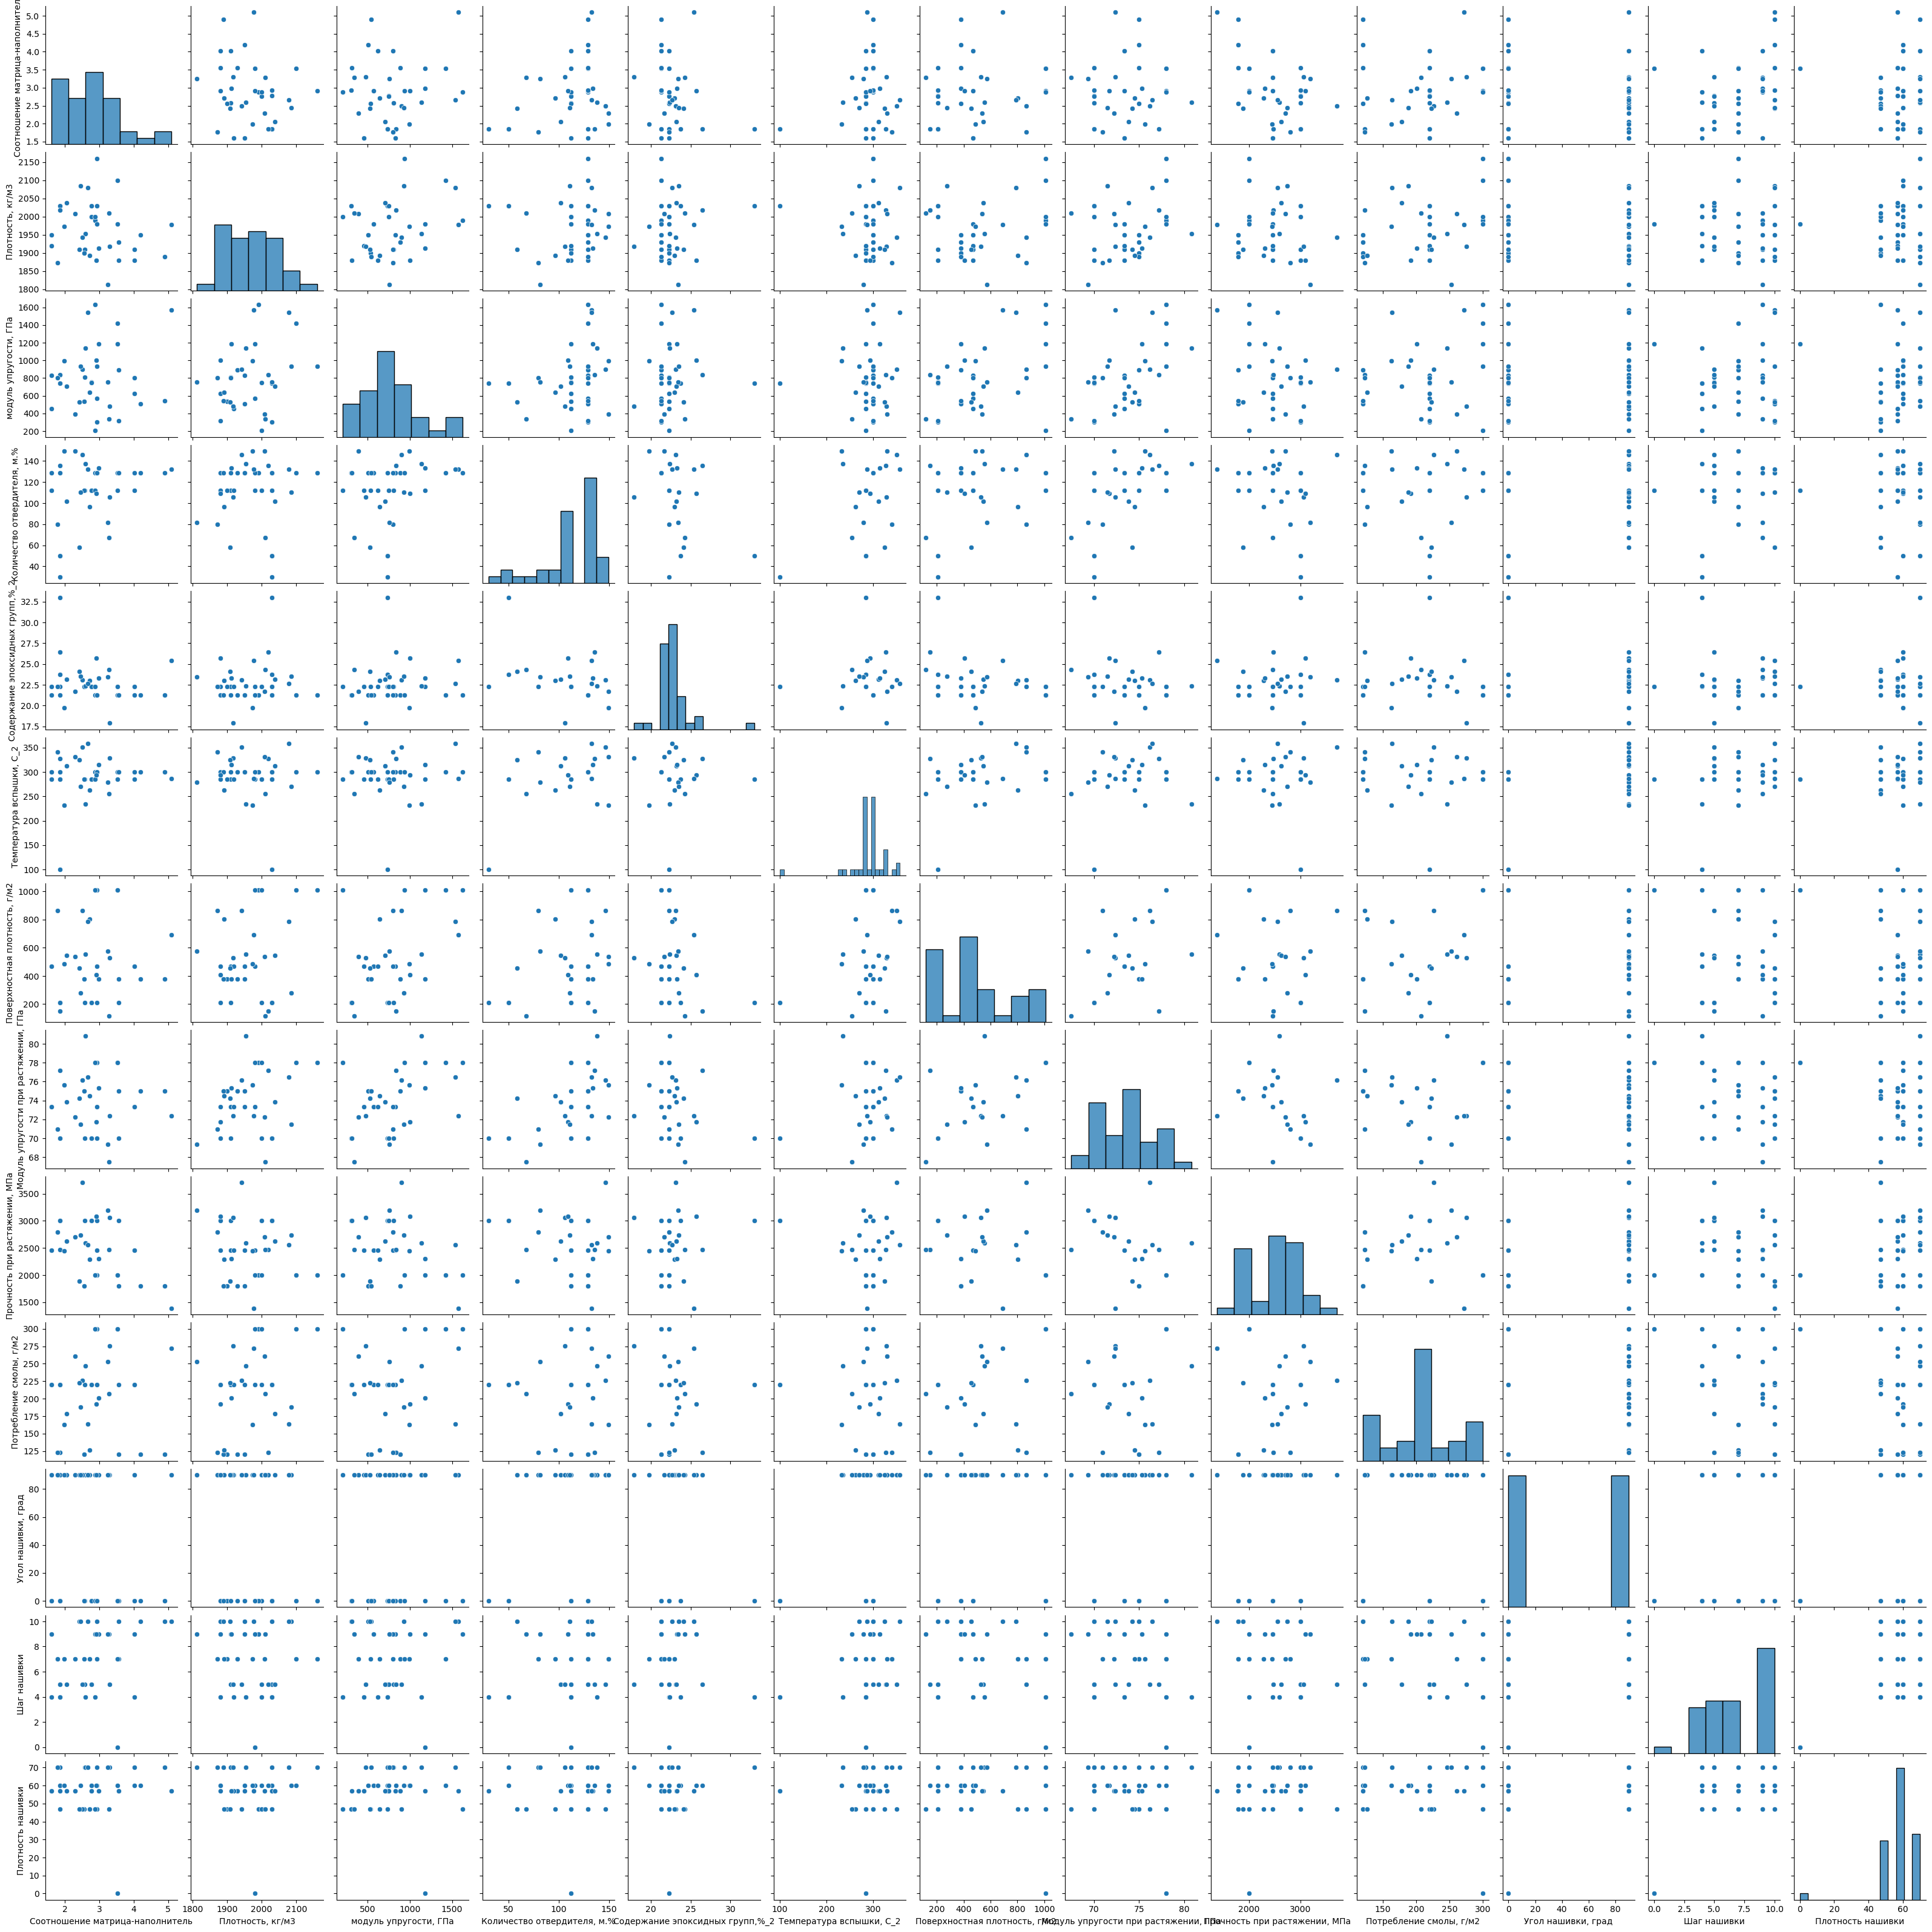

In [12]:
pp1 = sns.pairplot(composite_df[:40])
pp1.fig.savefig("composite_df1_pairplot.png")

<Axes: >

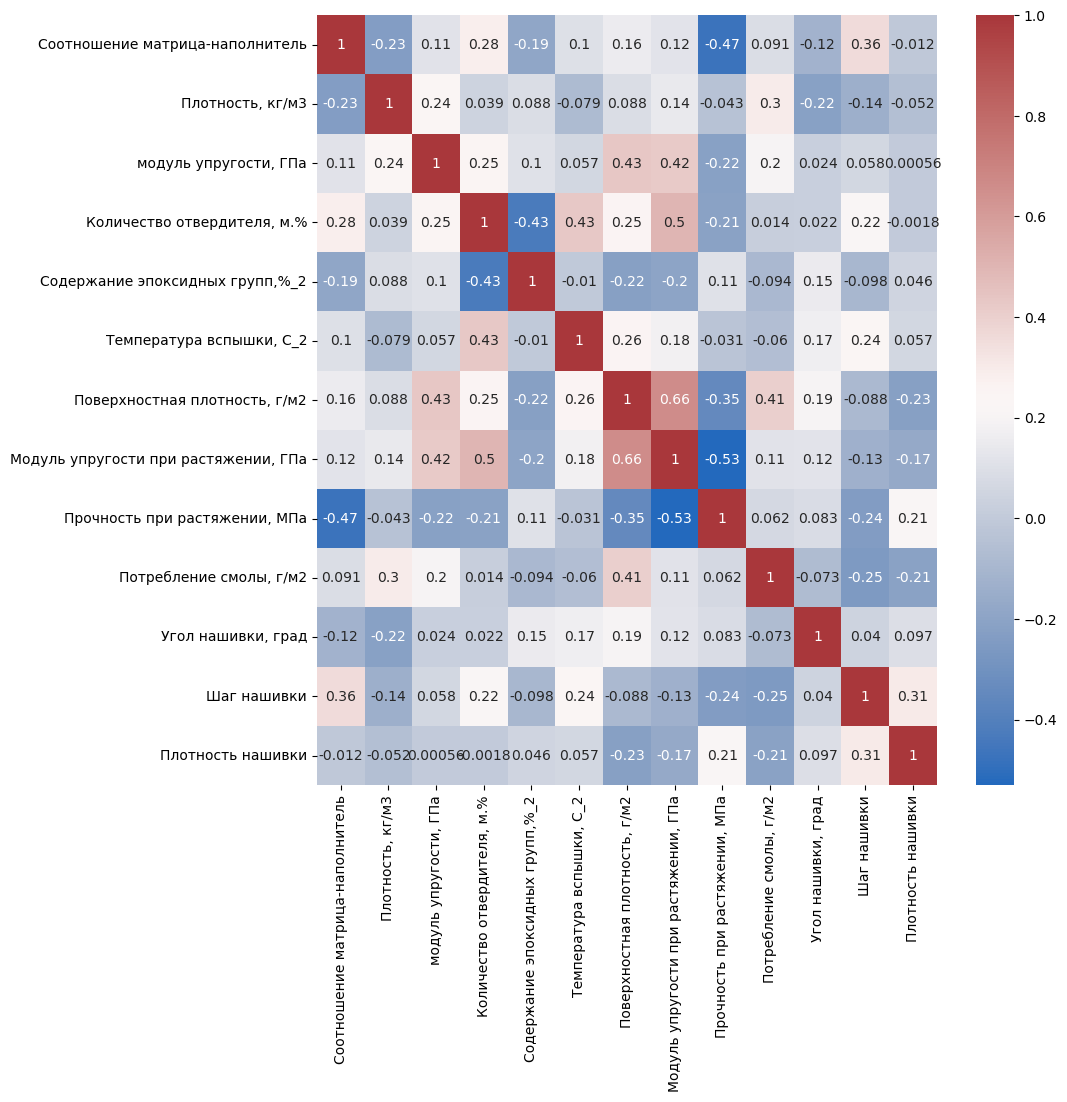

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(composite_df[:40].corr(), annot=True, cmap='vlag')

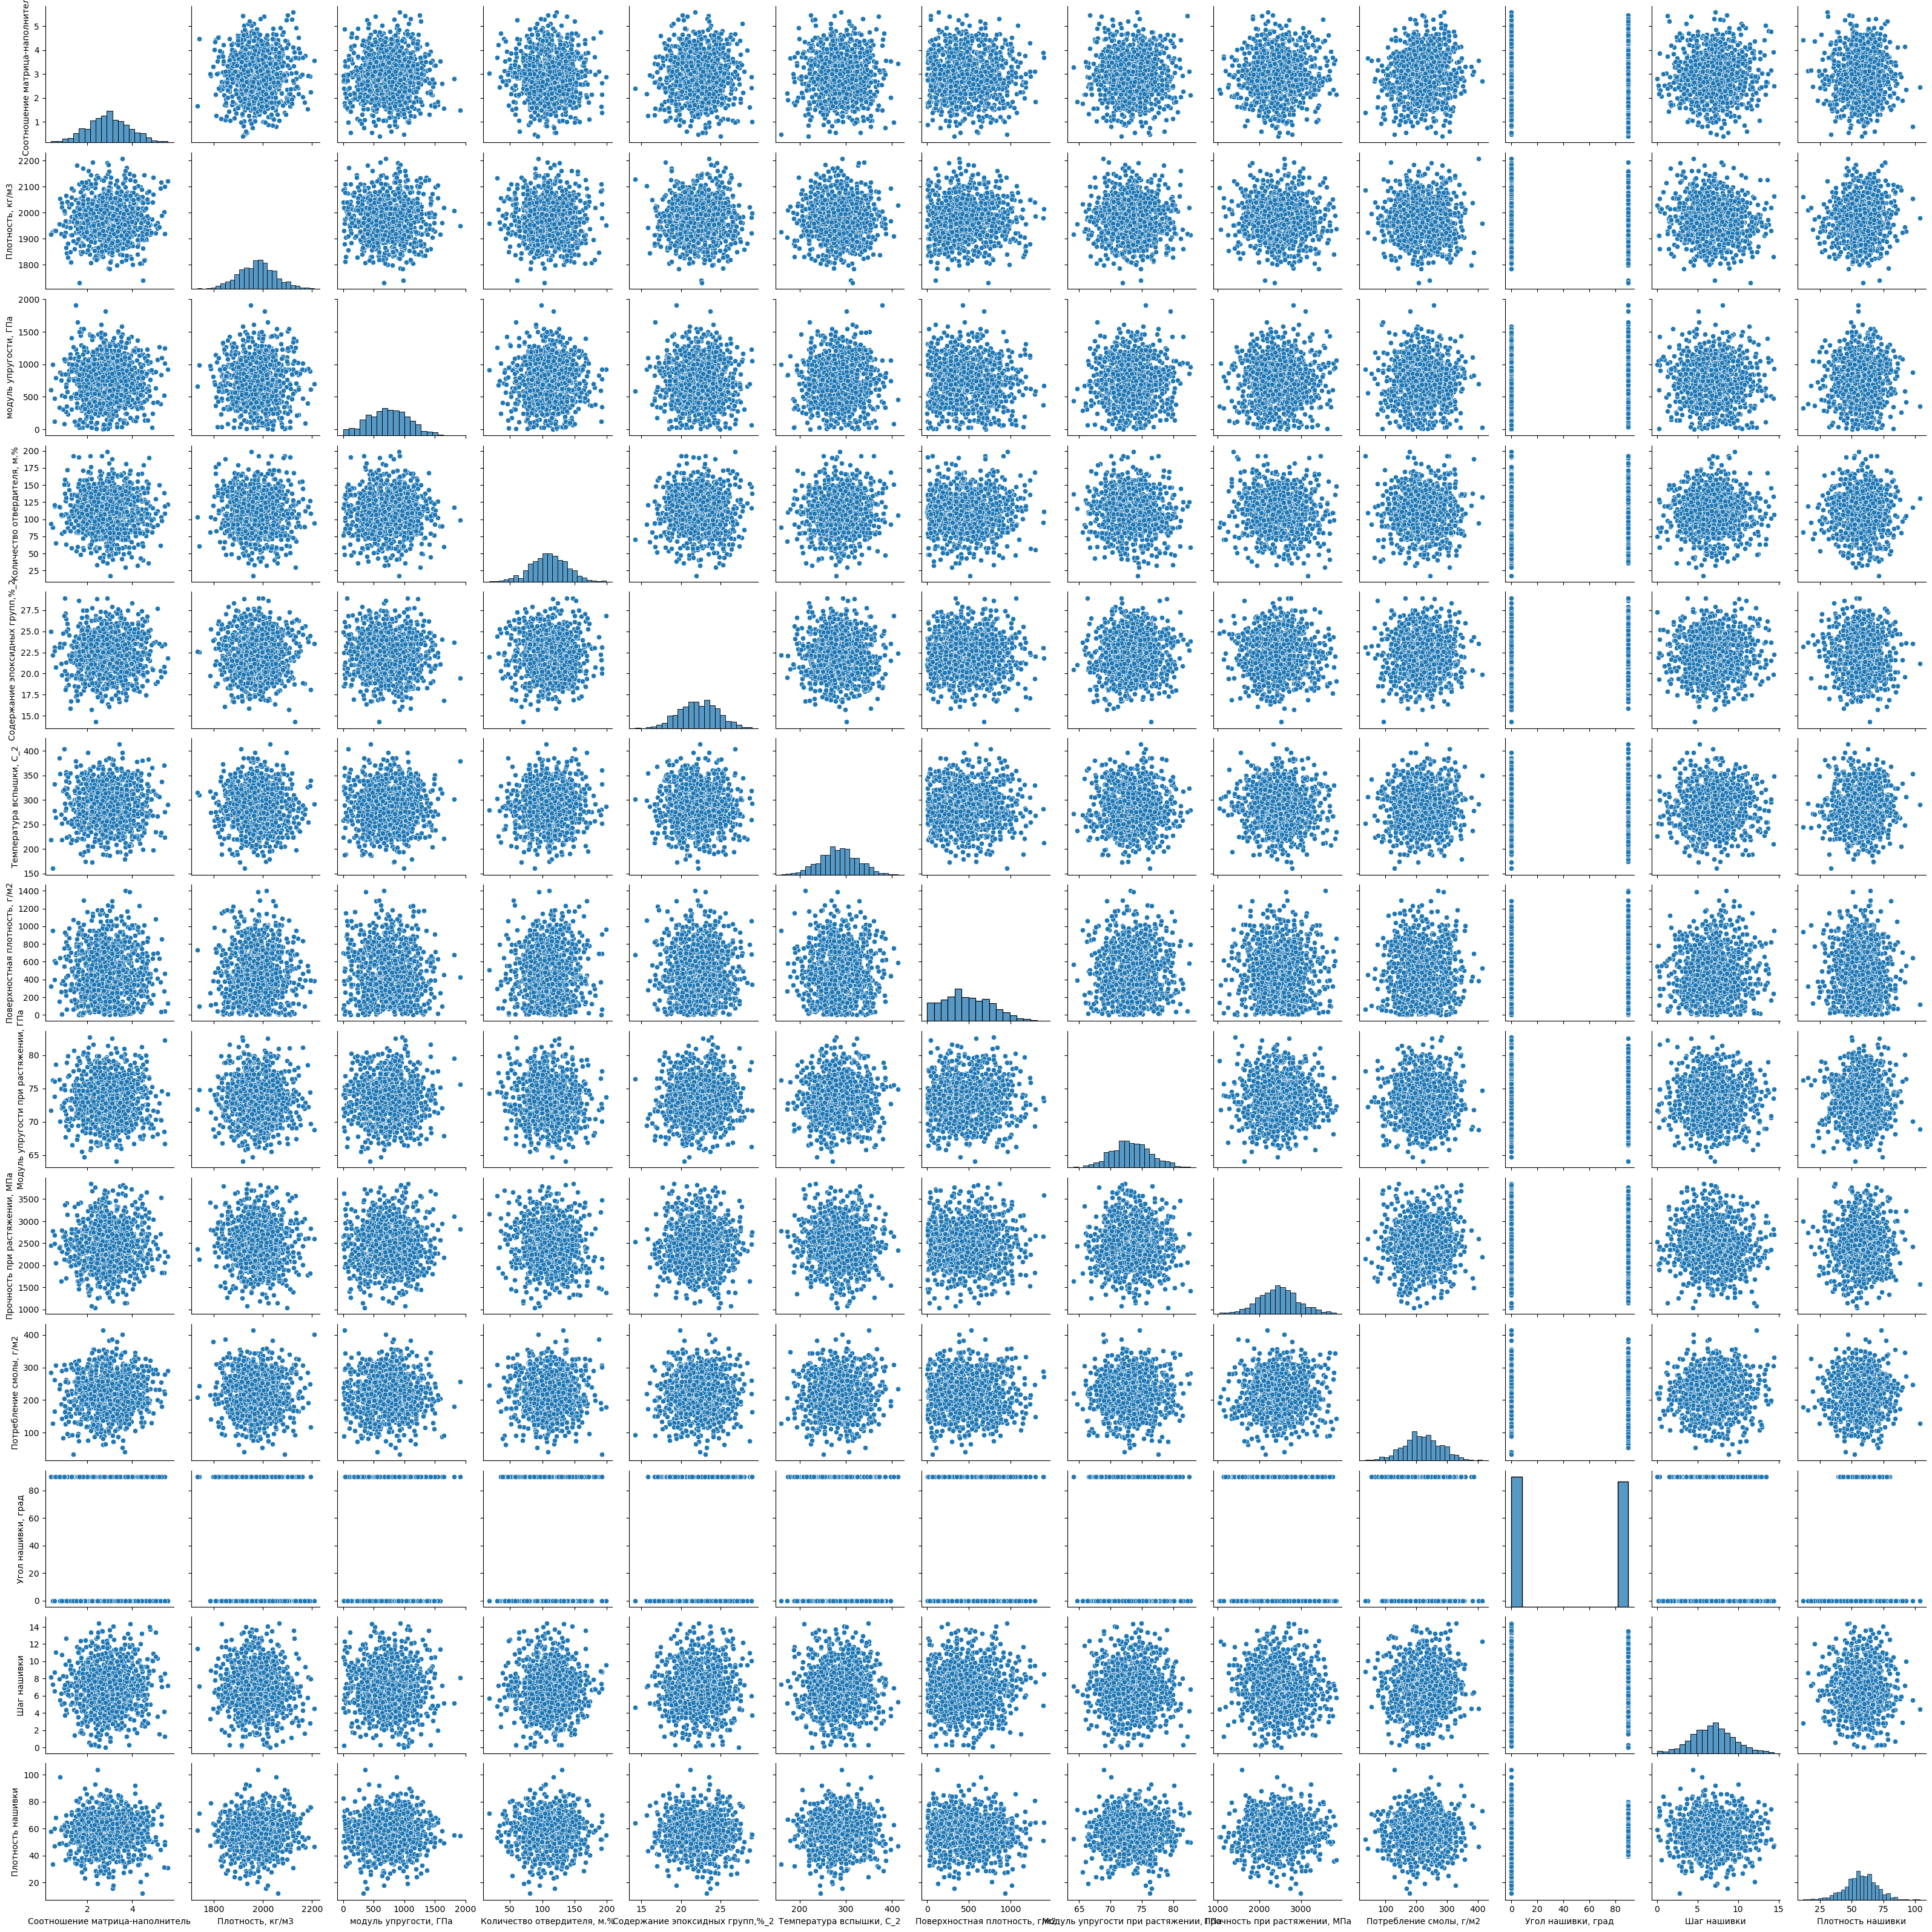

In [14]:
pp2 = sns.pairplot(composite_df[40:])
pp2.fig.savefig("composite_df2_pairplot.png")

<Axes: >

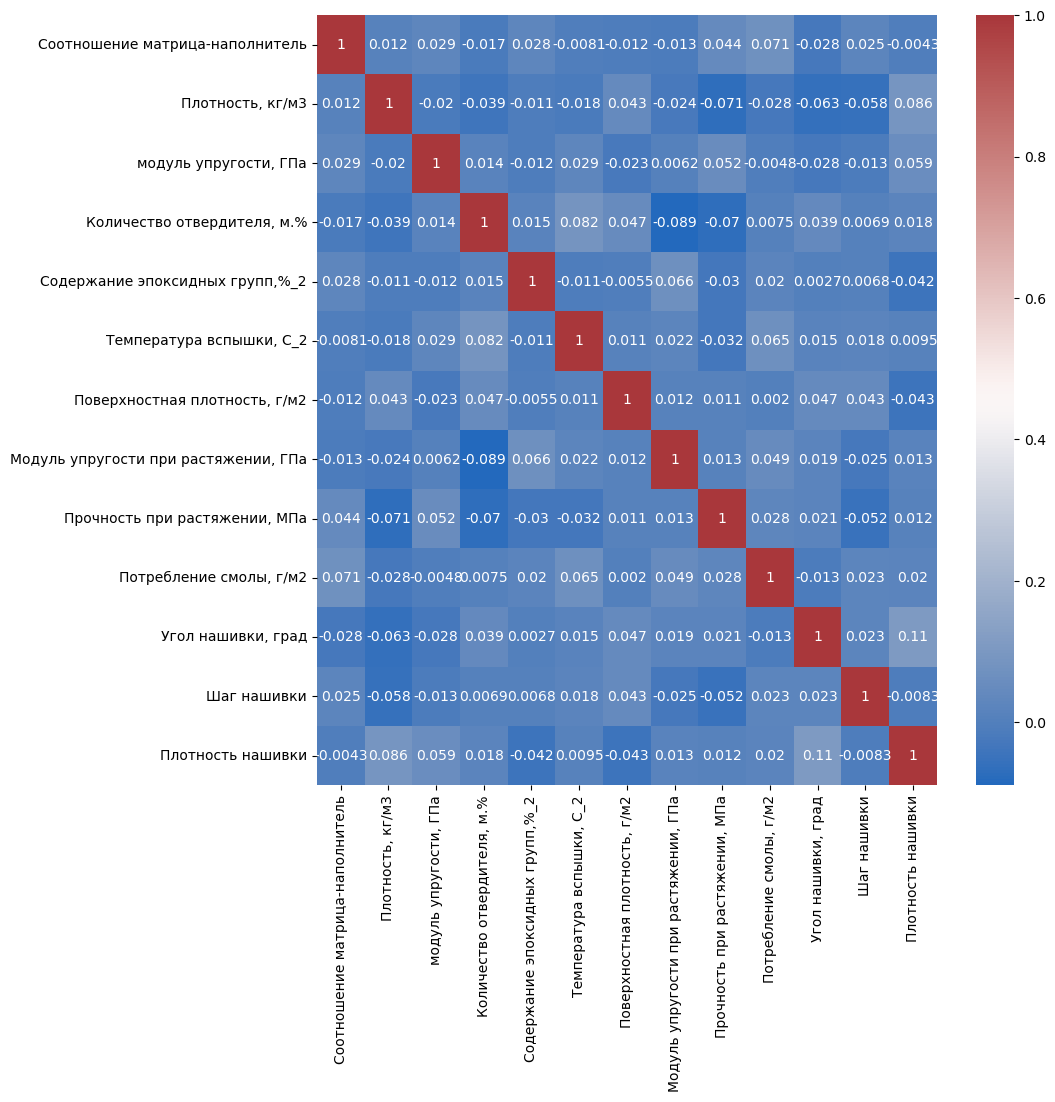

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(composite_df[40:].corr(), annot=True, cmap='vlag')

In [16]:
# Оставляем из датасета первые информативные 40 строк
composite_df = composite_df[:40]
composite_df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
index                                                      
0                             1.857143       2030.000000   
1                             1.857143       2030.000000   
2                             1.857143       2030.000000   
3                             1.857143       2030.000000   
4                             2.771331       2030.000000   
5                             2.767918       2000.000000   
6                             2.569620       1910.000000   
7                             2.561475       1900.000000   
8                             3.557018       1930.000000   
9                             3.532338       2100.000000   
10                            2.919678       2160.000000   
11                            2.877358       1990.000000   
12                            1.598174       1950.000000   
13                            2.919678       1980.000000   
14                            4.029126       1910.000000   
15                            2.934783       2030.000000   
16                            3.557018       1880.000000   
17                            4.193548       1950.000000   
18                            4.897959       1890.000000   
19                            3.532338       1980.000000   
20                            2.877358       2000.000000   
21                            1.598174       1920.000000   
22                            4.029126       1880.000000   
23                            2.587348       1953.274926   
24                            2.499918       1942.595777   
25                            2.046471       2037.631811   
26                            1.856476       2018.220332   
27                            3.305535       1917.907506   
28                            2.709554       1892.071124   
29                            2.282825       2008.357592   
30                            1.978140       1973.629097   
31                            1.771436       1872.491560   
32                            3.277087       2010.047012   
33                            2.984362       1912.315437   
34                            2.916150       1879.969846   
35                            3.247617       1813.234600   
36                            2.423876       1908.940601   
37                            5.098993       1977.339047   
38                            2.444177       2085.495837   
39                            2.667697       2078.894676   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
index                                                       
0                 738.736842                    30.000000   
1                 738.736842                    50.000000   
2                 738.736842                    49.900000   
3                 738.736842                   129.000000   
4                 753.000000                   111.860000   
5                 748.000000                   111.860000   
6                 807.000000                   111.860000   
7                 535.000000                   111.860000   
8                 889.000000                   129.000000   
9                1421.000000                   129.000000   
10                933.000000                   129.000000   
11               1628.000000                   129.000000   
12                827.000000                   129.000000   
13                568.000000                   129.000000   
14                800.000000                   129.000000   
15                302.000000                   129.000000   
16                313.000000                   129.000000   
17                506.000000                   129.000000   
18                540.000000                   129.000000   
19               1183.000000                   111.860000   
20                205.000000                   111.860000   
21                456.000000                   111.860000   
22                622.

In [19]:
#проверка на пропуски в каждом столбце
composite_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       40 non-null     float64
 1   Плотность, кг/м3                      40 non-null     float64
 2   модуль упругости, ГПа                 40 non-null     float64
 3   Количество отвердителя, м.%           40 non-null     float64
 4   Содержание эпоксидных групп,%_2       40 non-null     float64
 5   Температура вспышки, С_2              40 non-null     float64
 6   Поверхностная плотность, г/м2         40 non-null     float64
 7   Модуль упругости при растяжении, ГПа  40 non-null     float64
 8   Прочность при растяжении, МПа         40 non-null     float64
 9   Потребление смолы, г/м2               40 non-null     float64
 10  Угол нашивки, град                    40 non-null     int64  
 11  Шаг нашивки               

In [132]:
#подсчет количества уникальных значений в каждом столбце
composite_df.nunique()

Соотношение матрица-наполнитель         31
Плотность, кг/м3                        30
модуль упругости, ГПа                   37
Количество отвердителя, м.%             22
Содержание эпоксидных групп,%_2         21
Температура вспышки, С_2                20
Поверхностная плотность, г/м2           21
Модуль упругости при растяжении, ГПа    21
Прочность при растяжении, МПа           21
Потребление смолы, г/м2                 20
Угол нашивки, град                       2
Шаг нашивки                              6
Плотность нашивки                        5
dtype: int64

In [133]:
#подсчет количества дубликатов
composite_df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'Соотношение матрица-наполнитель'}>,
        <Axes: title={'center': 'Плотность, кг/м3'}>,
        <Axes: title={'center': 'модуль упругости, ГПа'}>,
        <Axes: title={'center': 'Количество отвердителя, м.%'}>],
       [<Axes: title={'center': 'Содержание эпоксидных групп,%_2'}>,
        <Axes: title={'center': 'Температура вспышки, С_2'}>,
        <Axes: title={'center': 'Поверхностная плотность, г/м2'}>,
        <Axes: title={'center': 'Модуль упругости при растяжении, ГПа'}>],
       [<Axes: title={'center': 'Прочность при растяжении, МПа'}>,
        <Axes: title={'center': 'Потребление смолы, г/м2'}>,
        <Axes: title={'center': 'Угол нашивки, град'}>,
        <Axes: title={'center': 'Шаг нашивки'}>],
       [<Axes: title={'center': 'Плотность нашивки'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

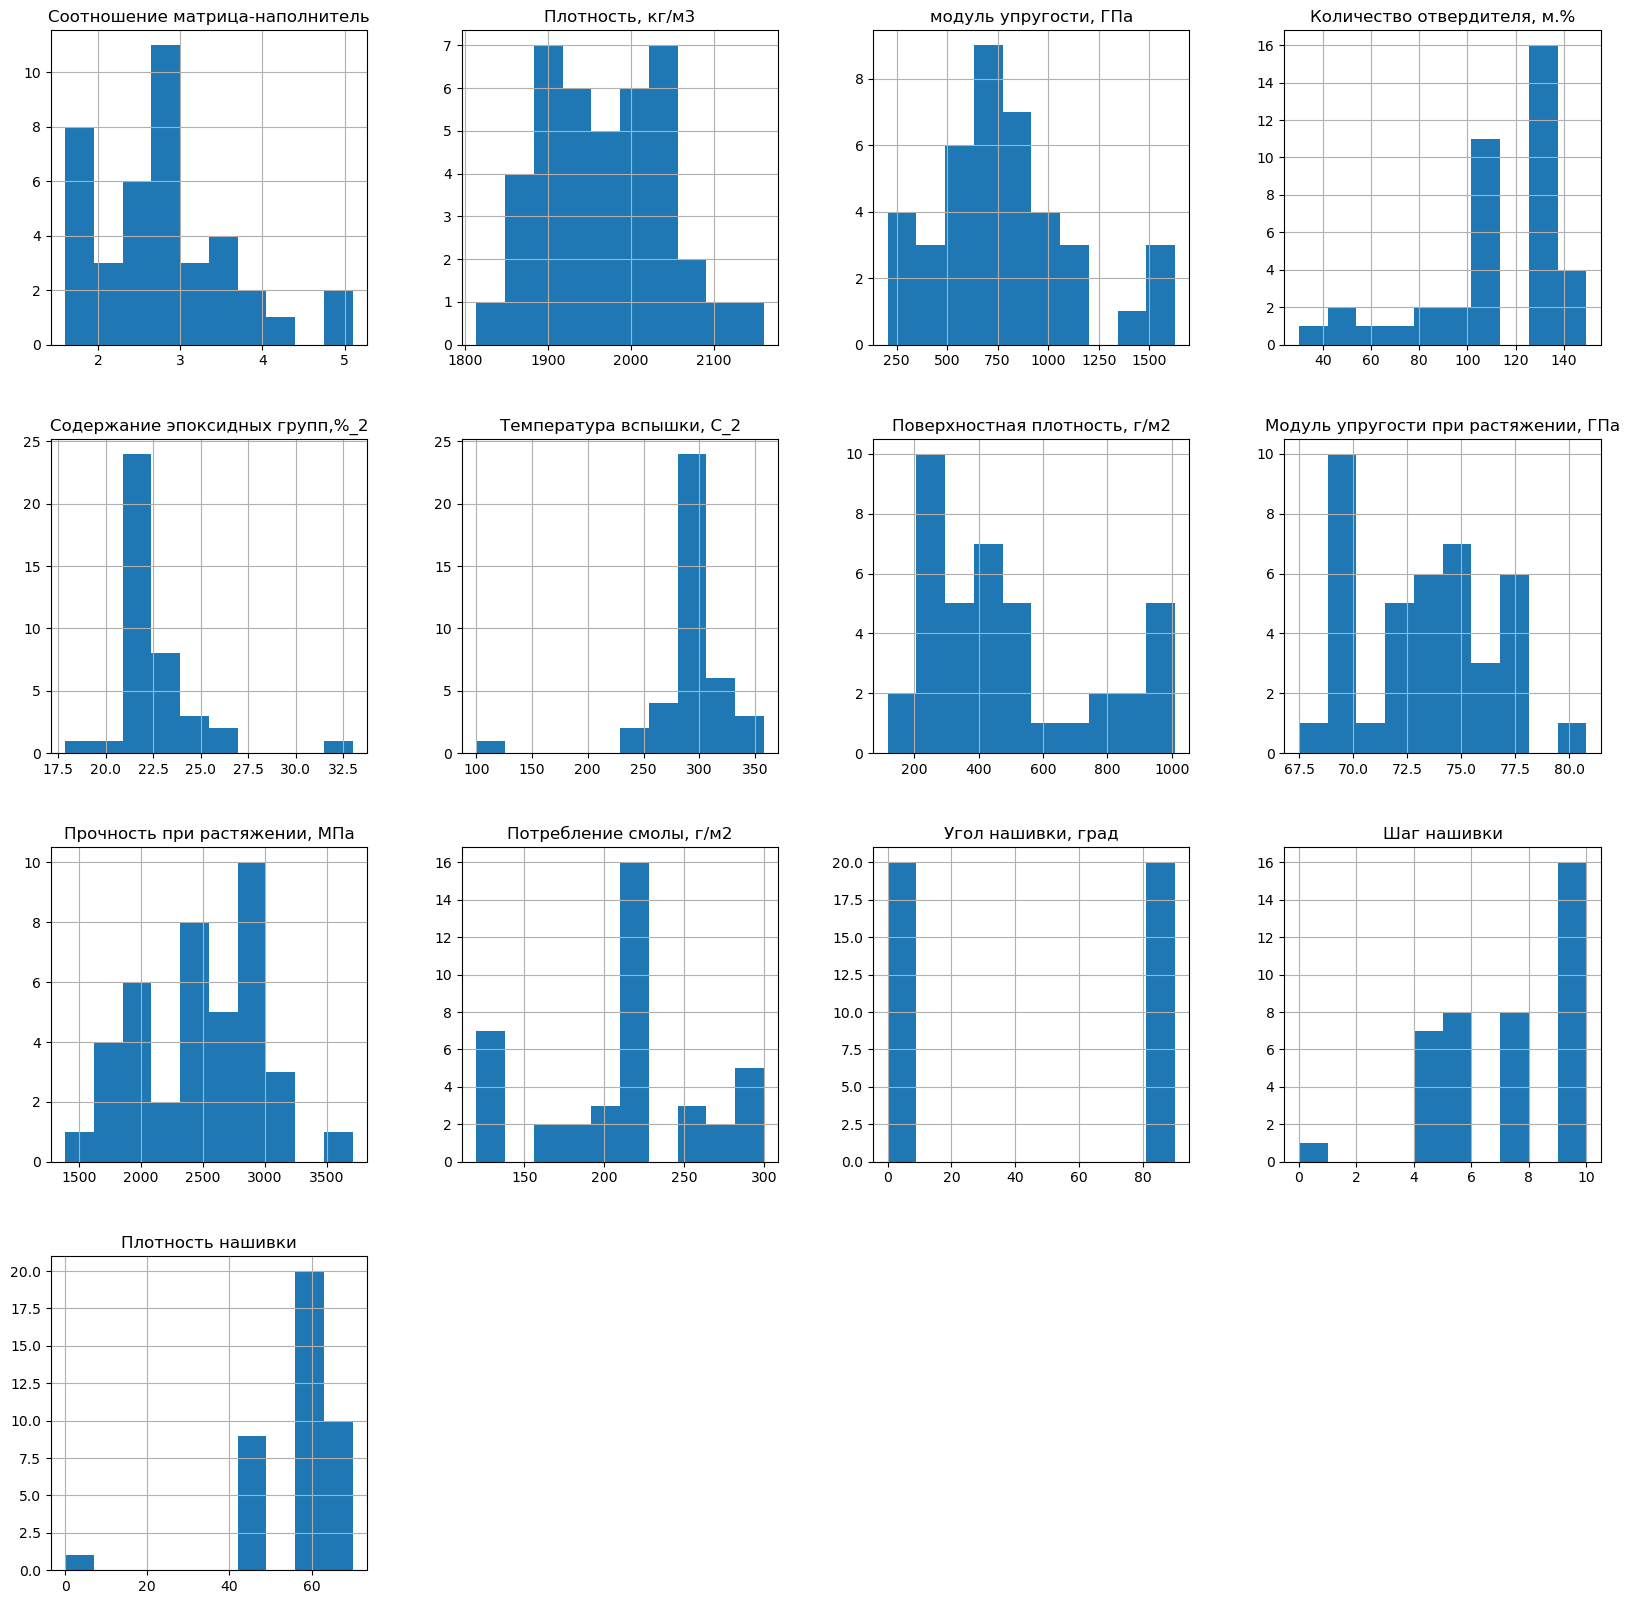

In [134]:
composite_df.hist(figsize = (20, 20))

In [135]:
#Cтатистические значения
composite_df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель        40.0     2.831256    0.848290   
Плотность, кг/м3                       40.0  1969.810420   73.536838   
модуль упругости, ГПа                  40.0   793.464589  344.647852   
Количество отвердителя, м.%            40.0   112.488835   28.453910   
Содержание эпоксидных групп,%_2        40.0    22.599959    2.284052   
Температура вспышки, С_2               40.0   291.233848   40.586251   
Поверхностная плотность, г/м2          40.0   495.934107  275.139640   
Модуль упругости при растяжении, ГПа   40.0    73.468477    3.141617   
Прочность при растяжении, МПа          40.0  2519.604922  505.136369   
Потребление смолы, г/м2                40.0   212.068096   54.703508   
Угол нашивки, град                     40.0    45.000000   45.573272   
Шаг нашивки                            40.0     6.900000    2.519666   
Плотность нашивки                      40.0    57.325000   12.325474   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          1.598174     2.223737     2.769625   
Плотность, кг/м3                      1813.234600  1910.000000  1975.484072   
модуль упругости, ГПа                  205.000000   538.750000   750.500000   
Количество отвердителя, м.%             30.000000   108.376380   120.430000   
Содержание эпоксидных групп,%_2         17.874100    21.250000    22.267857   
Температура вспышки, С_2               100.000000   284.615385   300.000000   
Поверхностная плотность, г/м2          117.535234   210.000000   470.000000   
Модуль упругости при растяжении, ГПа    67.478707    70.000000    73.333333   
Прочность при растяжении, МПа         1386.578973  2000.000000  2467.896290   
Потребление смолы, г/м2                120.000000   185.445669   220.000000   
Угол нашивки, град                       0.000000     0.000000    45.000000   
Шаг нашивки                              0.000000     5.000000     7.000000   
Плотность нашивки                        0.000000    54.500000    58.500000   

                                              75%          max  
Соотношение матрица-наполнитель          3.284199     5.098993  
Плотность, кг/м3                      2030.000000  2160.000000  
модуль упругости, ГПа                  931.732977  1628.000000  
Количество отвердителя, м.%            129.000000   149.372832  
Содержание эпоксидных групп,%_2         23.175744    33.000000  
Температура вспышки, С_2               300.000000   357.972896  
Поверхностная плотность, г/м2          603.888352  1010.000000  
Модуль упругости при растяжении, ГПа    75.384264    80.803222  
Прочность при растяжении, МПа         3000.000000  3705.672523  
Потребление смолы, г/м2                231.320349   300.000000  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              9.000000    10.000000  
Плотность нашивки                       62.500000    70.000000

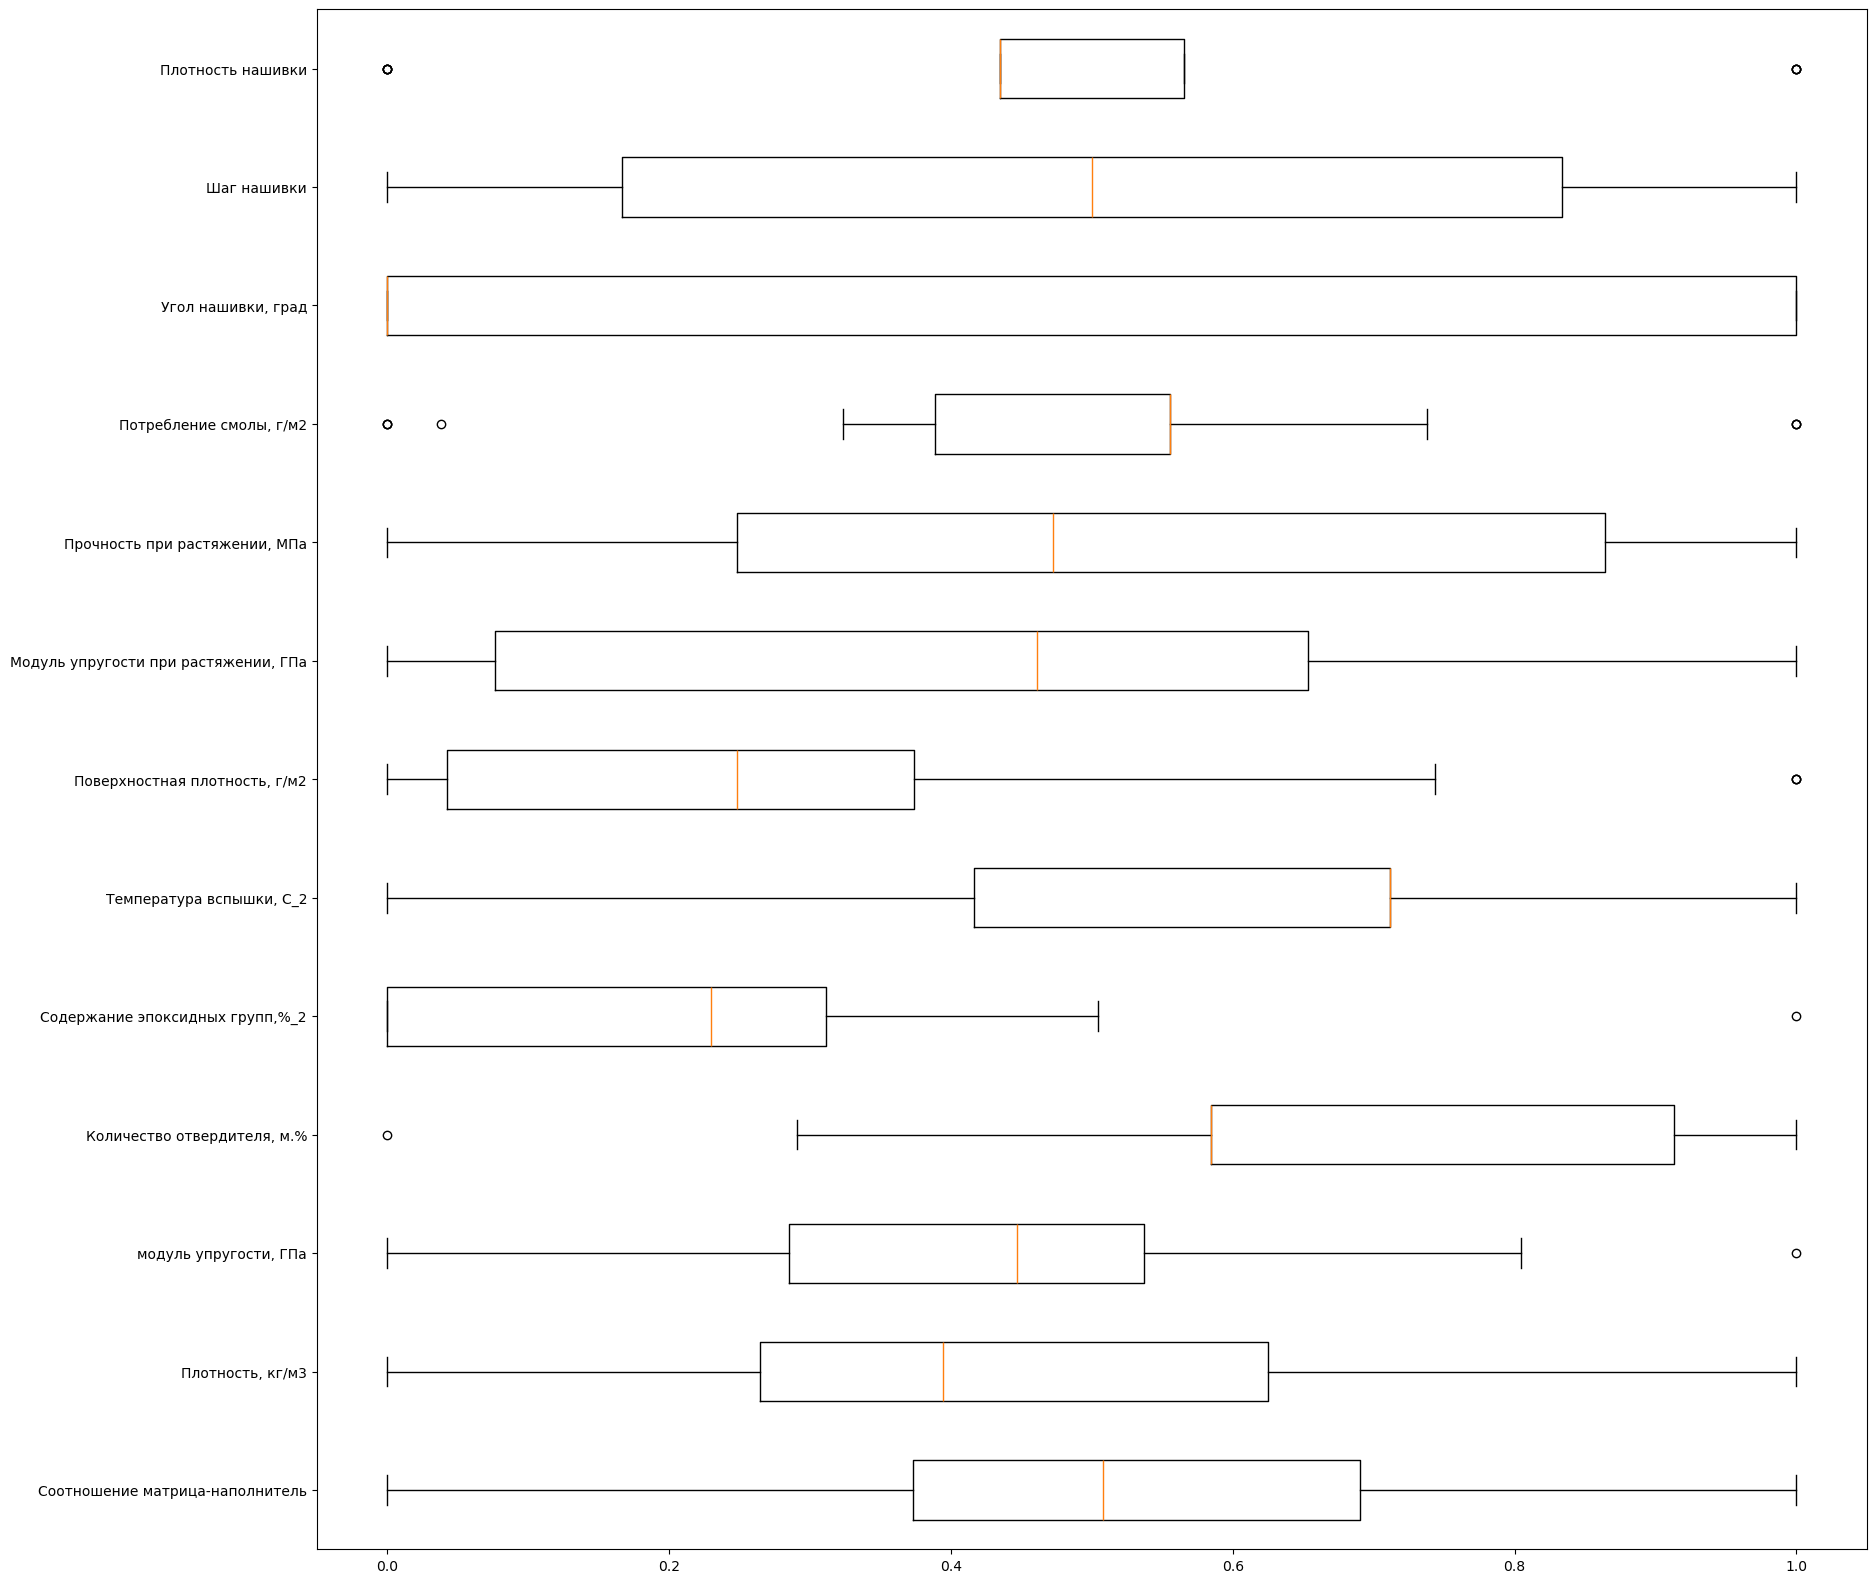

In [9]:
#Отображение основных статистических значений с помощью "ящиков с усами". Для наилучшей наглядности проведено масштабирование данных
scaler = MinMaxScaler()
scaler.fit(composite_df)
plt.figure(figsize=(20, 20))
plt.boxplot(scaler.transform(composite_df), tick_labels=composite_df.columns, vert=False)
plt.savefig('boxplot_s_vibrosami.png')

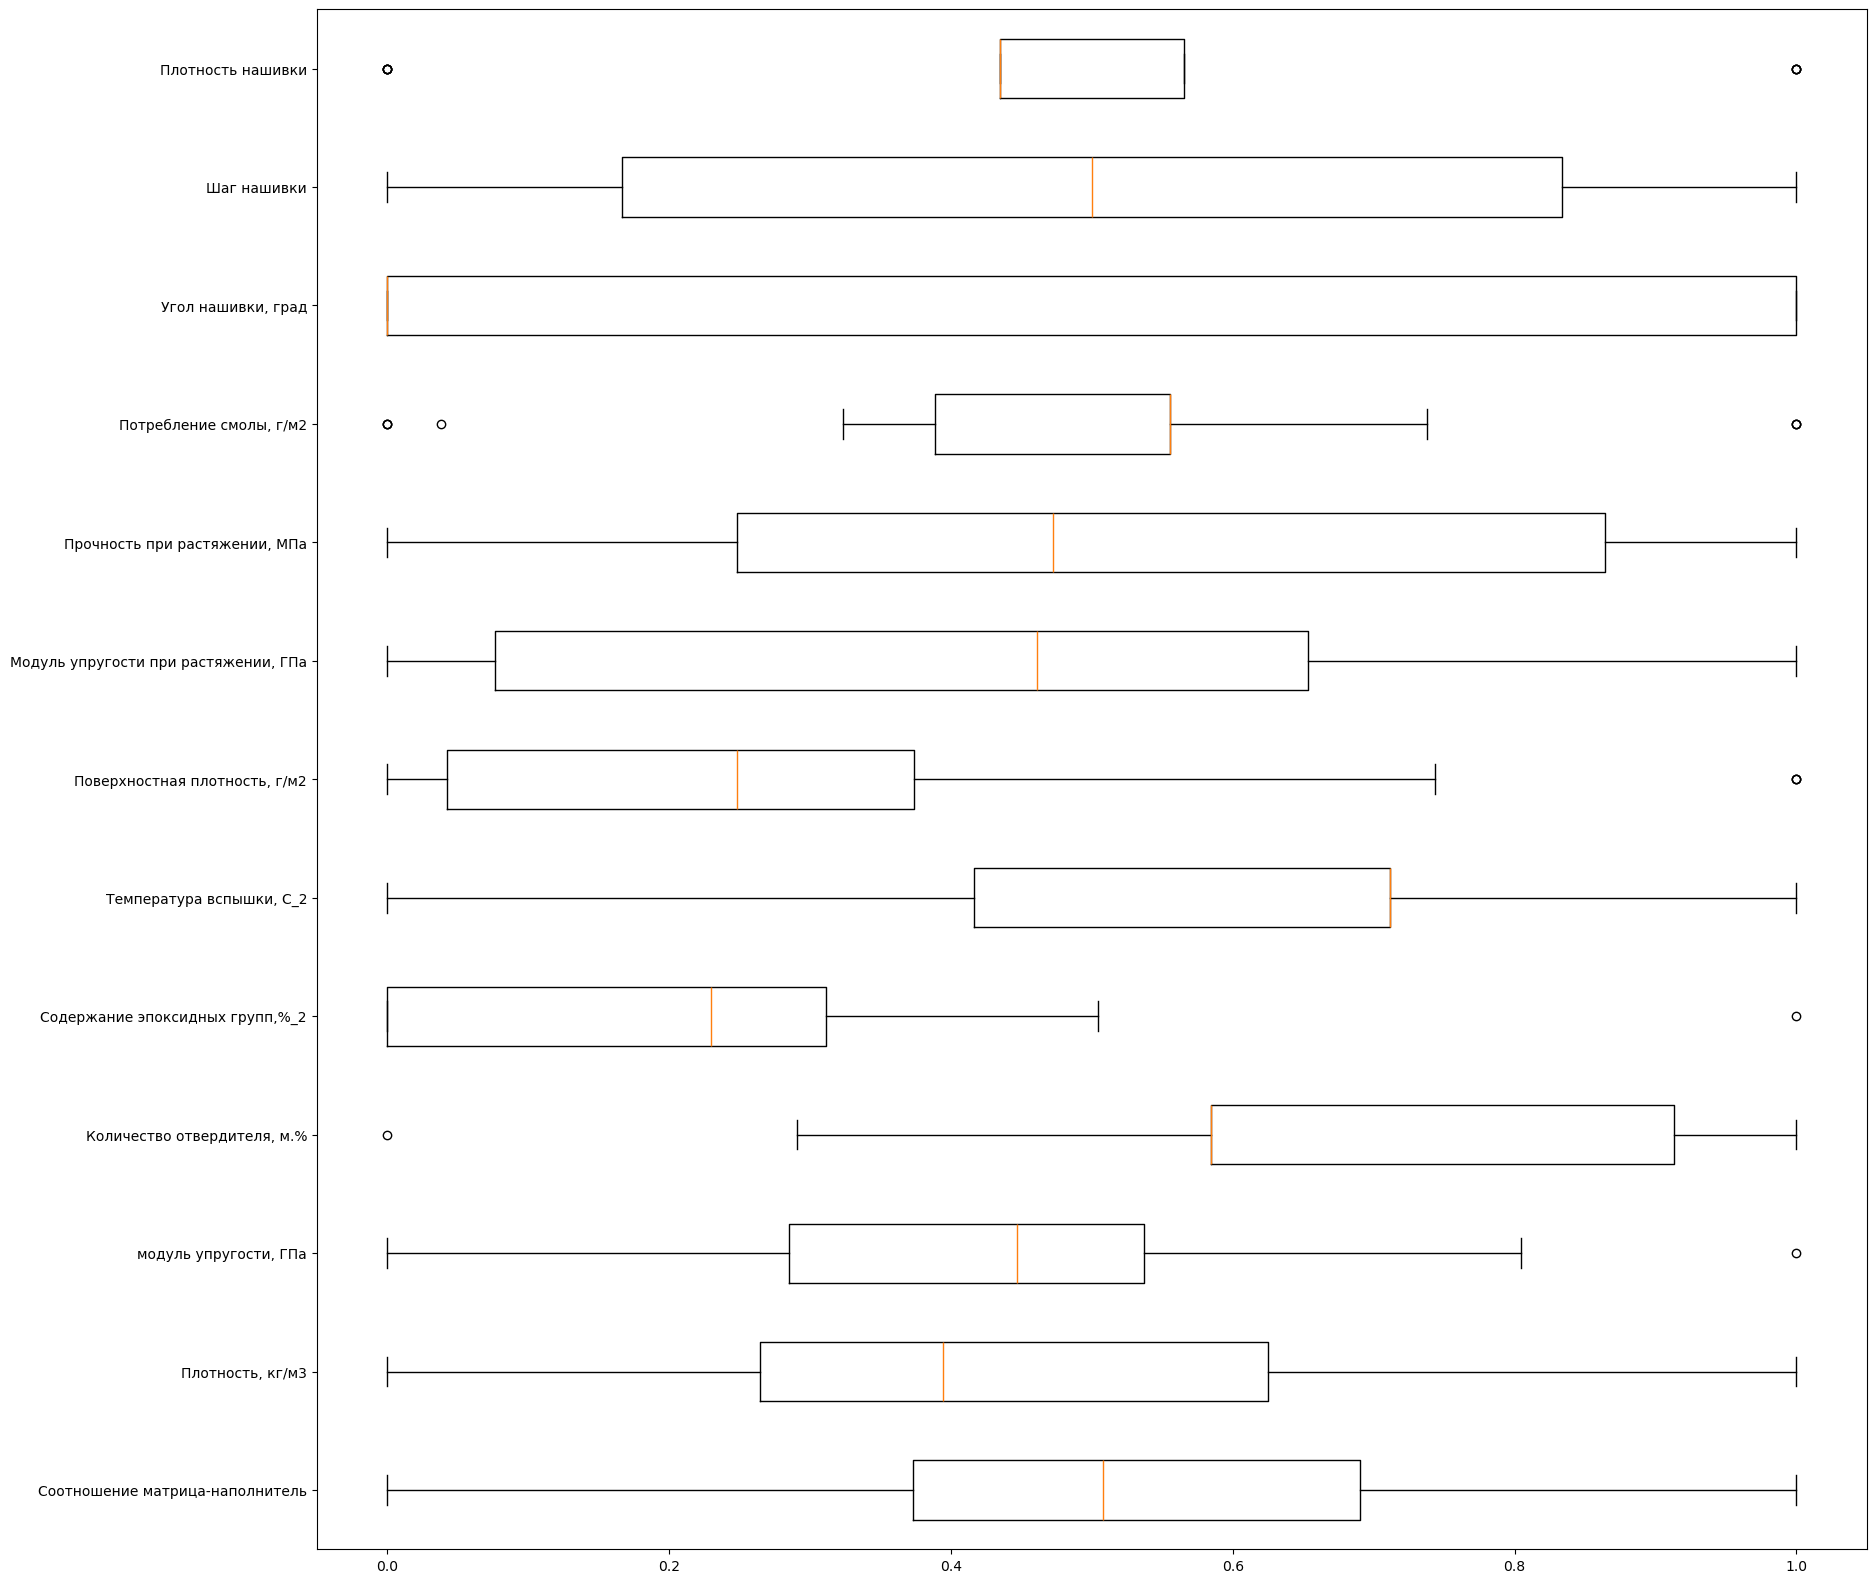

In [17]:
#Заменим выбросы на пустые значения
for col in composite_df.columns:
    q1 = composite_df[col].quantile(0.25)
    q3 = composite_df[col].quantile(0.75)
    iqr = q3 - q1

    x_max = q3 + 1.5*iqr
    x_min = q1 - 1.5*iqr
    
    composite_df.loc[:, col] = np.where((composite_df.loc[:, col] > x_max), np.nan, composite_df.loc[:, col])
    composite_df.loc[:, col] = np.where((composite_df.loc[:, col] < x_min), np.nan, composite_df.loc[:, col])


composite_df = composite_df.dropna()


scaler.fit(composite_df)
plt.figure(figsize=(20, 20))
plt.boxplot(scaler.transform(composite_df), tick_labels=composite_df.columns, vert=False)
plt.savefig('boxplot_bez_vibrosov.png')

In [18]:
composite_df.shape

(23, 13)

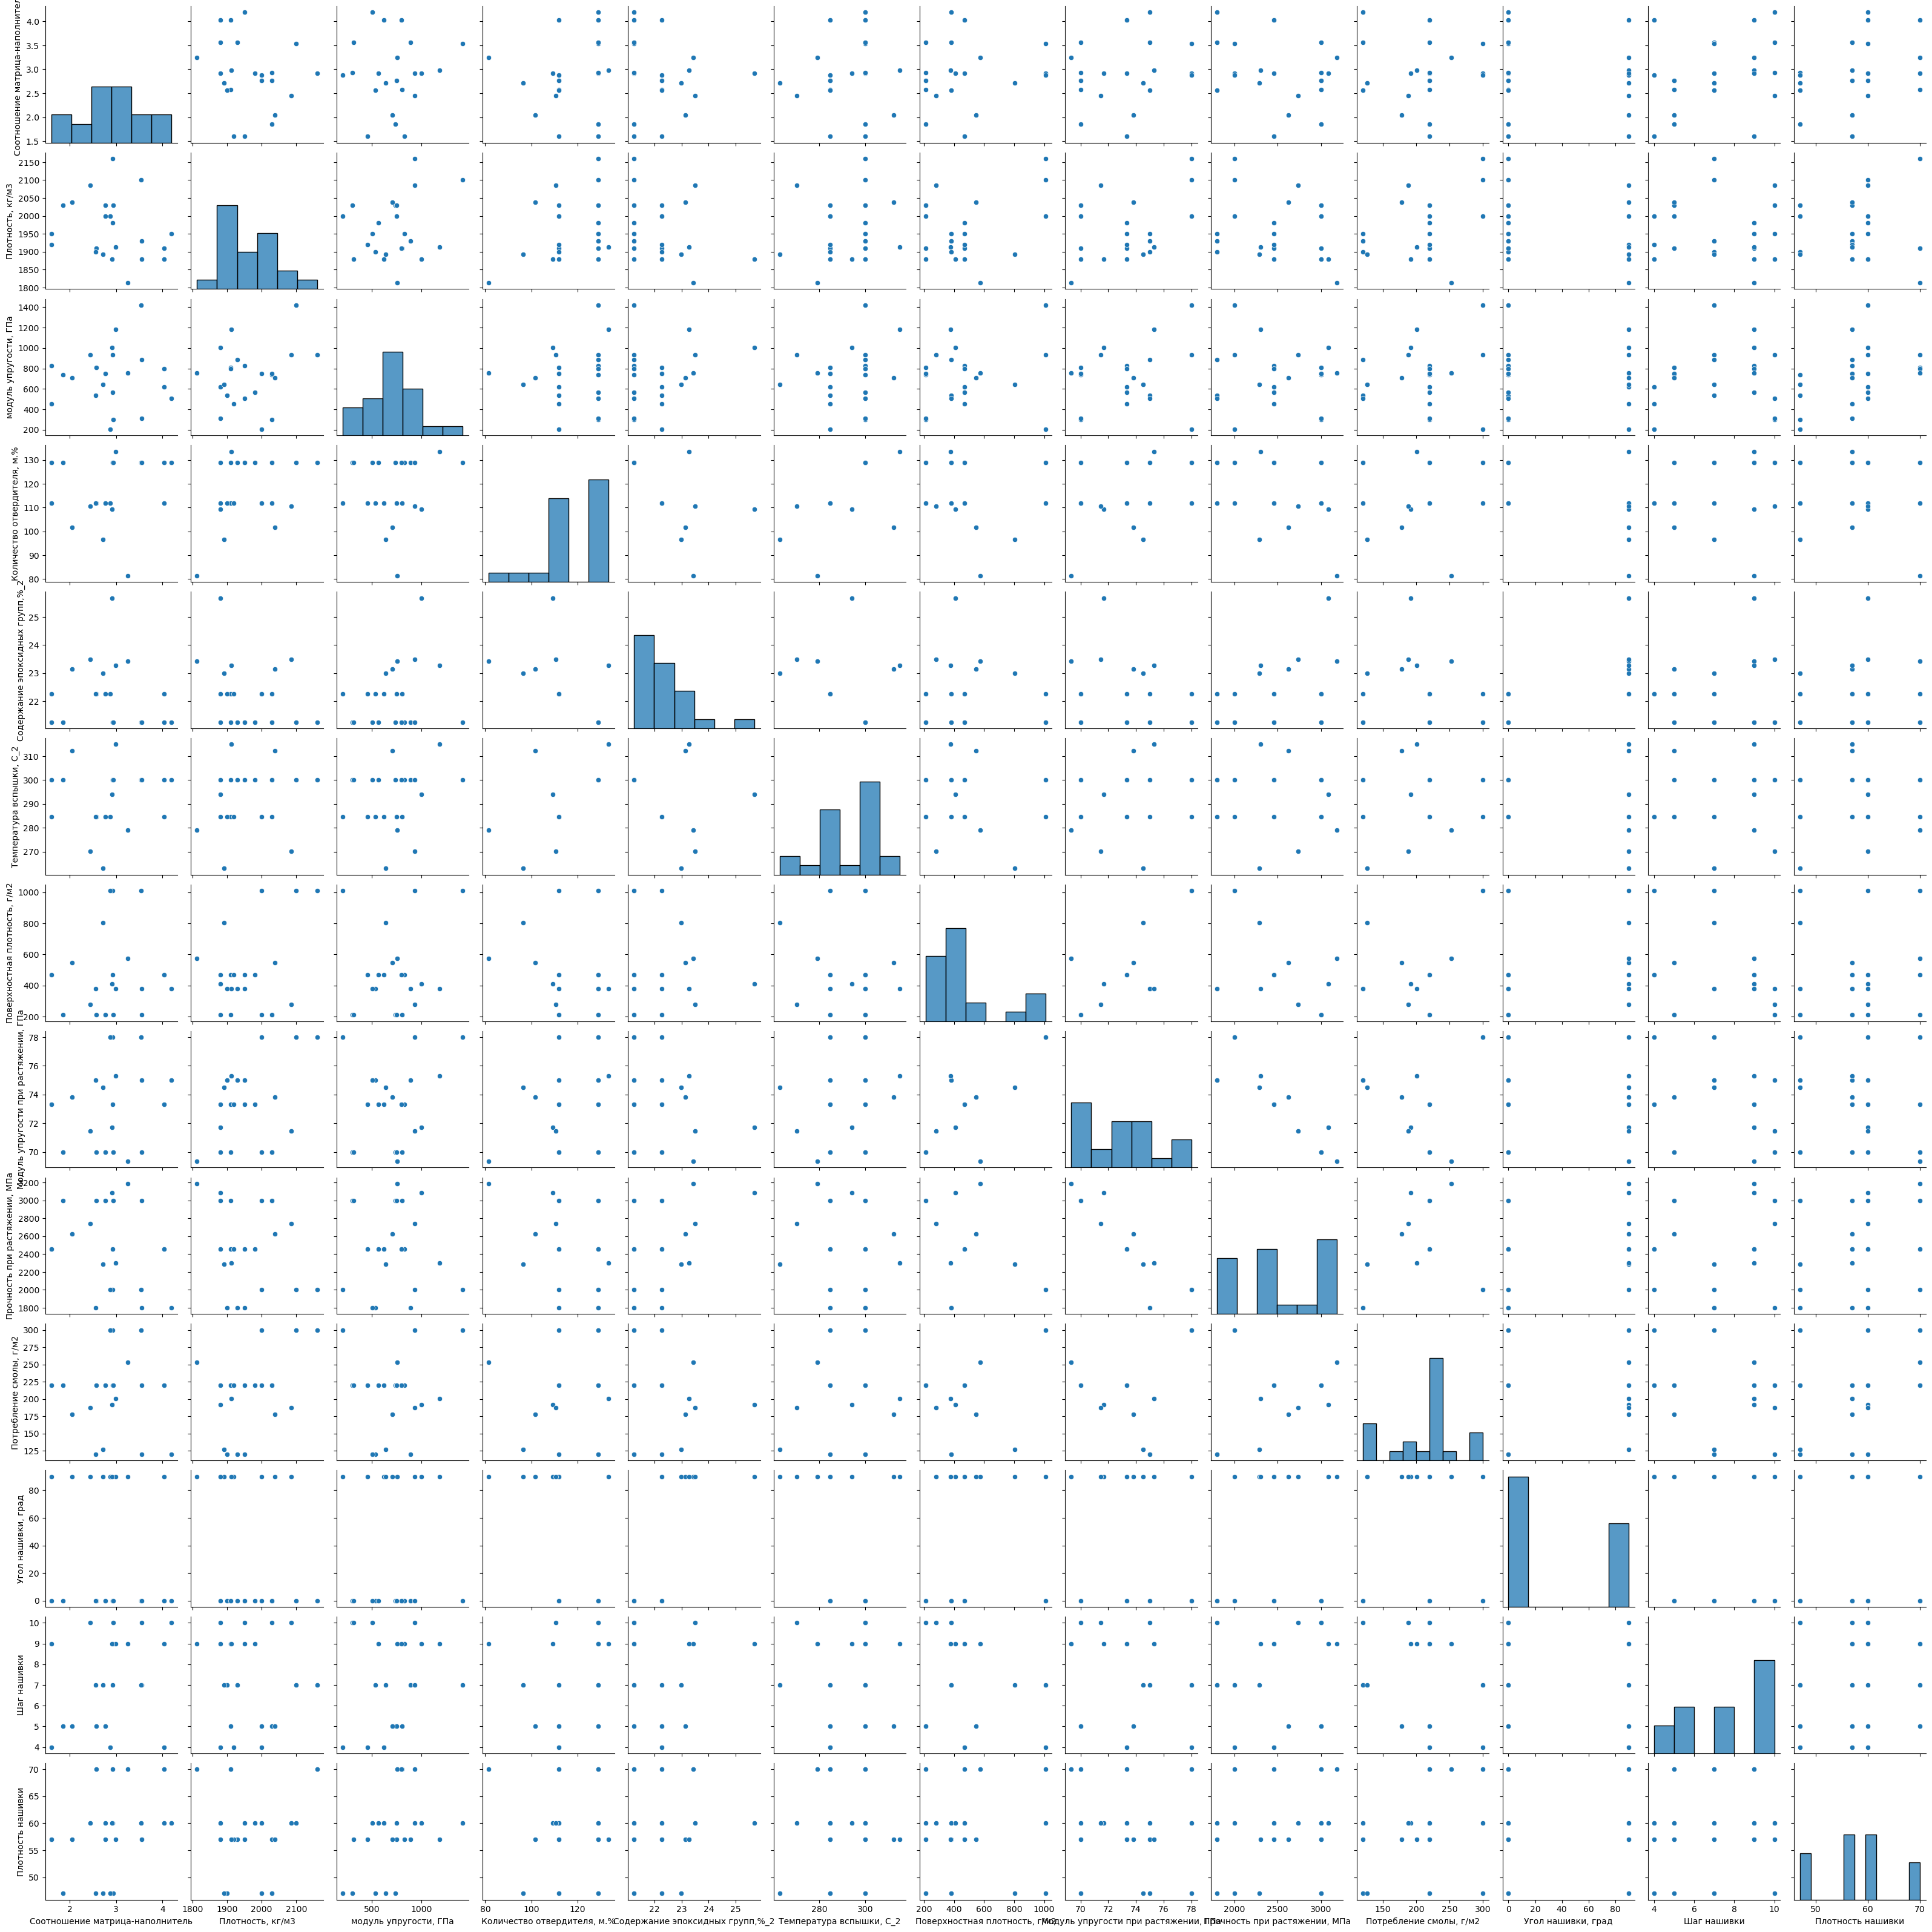

In [40]:
pp3 = sns.pairplot(composite_df)
pp3.fig.savefig("pairplot_not_normal.png")

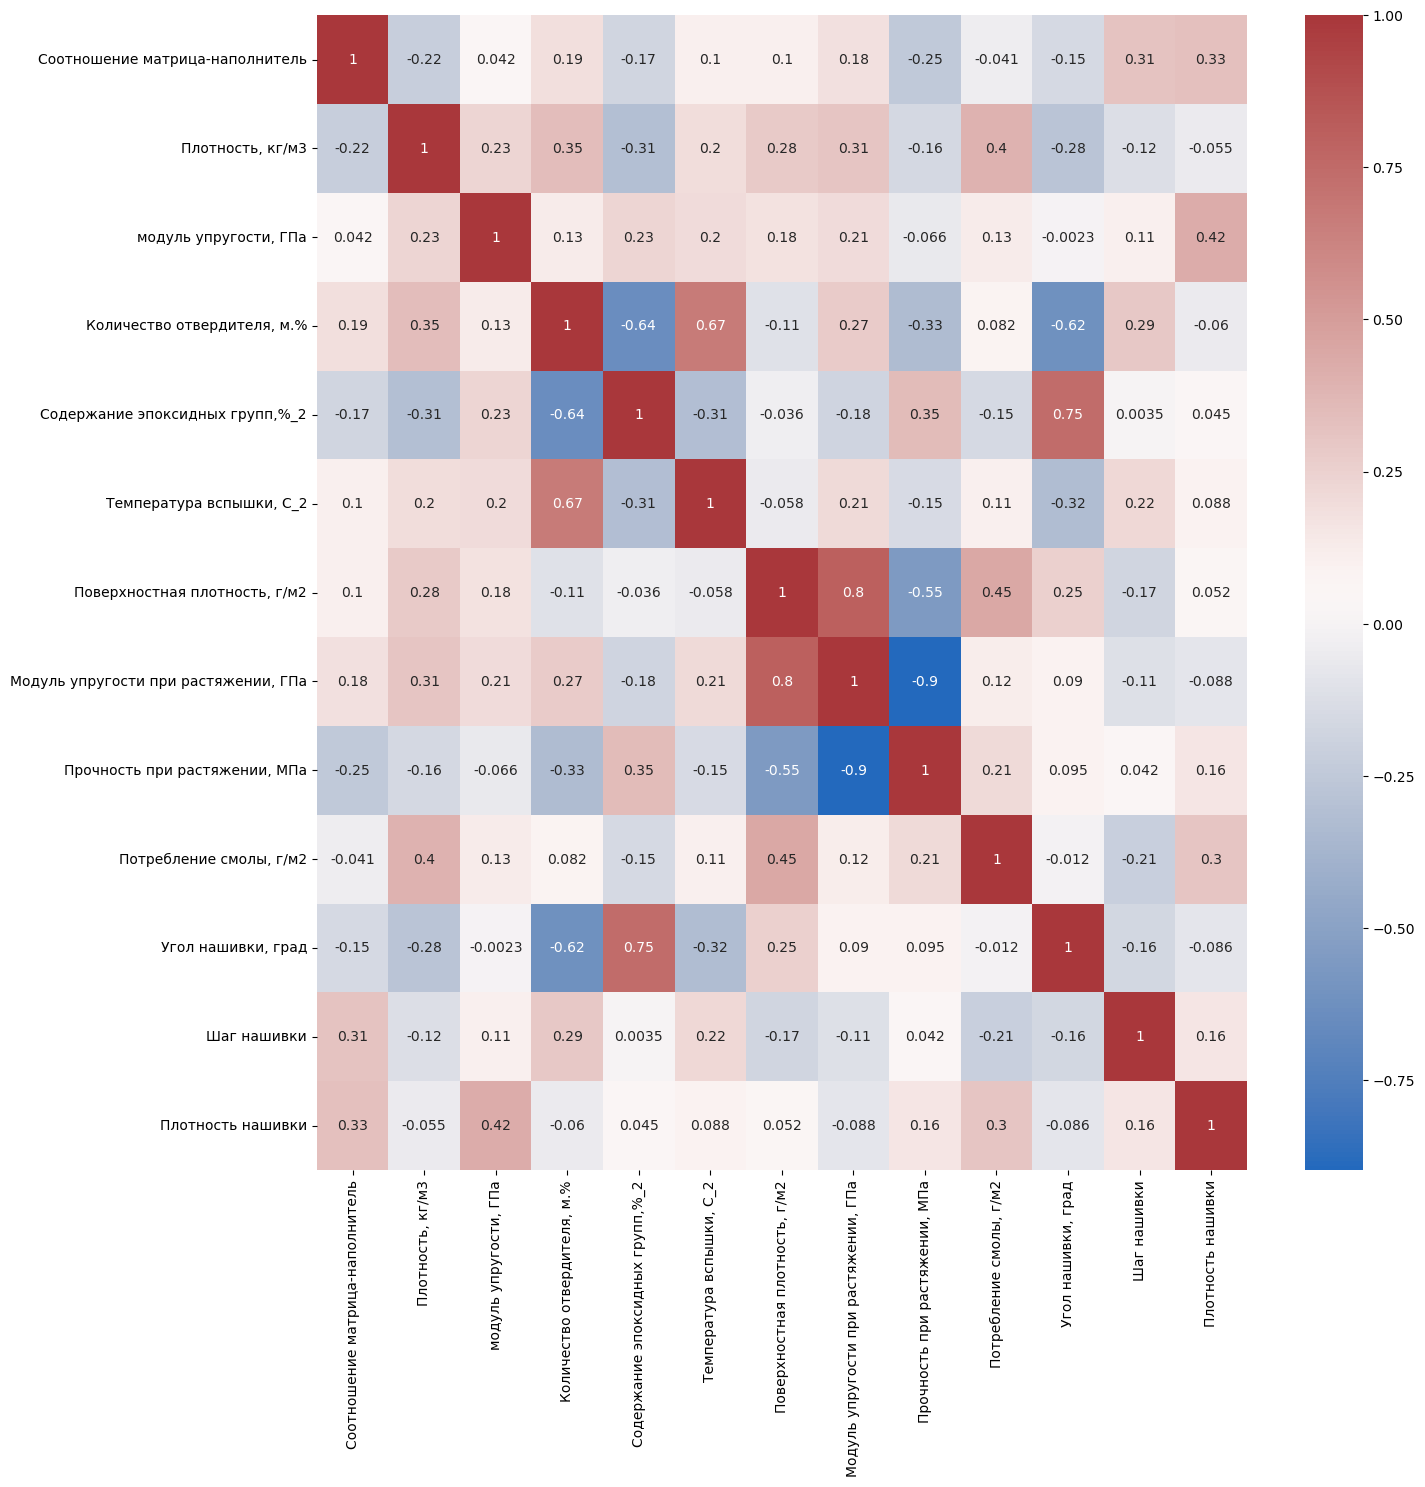

In [43]:
plt.figure(figsize=(15, 15))
hm1 = sns.heatmap(composite_df.corr(), annot=True, cmap='vlag')
plt.savefig("heatmap_not_normal.png")

In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(composite_df)
scaled_df = pd.DataFrame(scaled_data, columns=composite_df.columns)

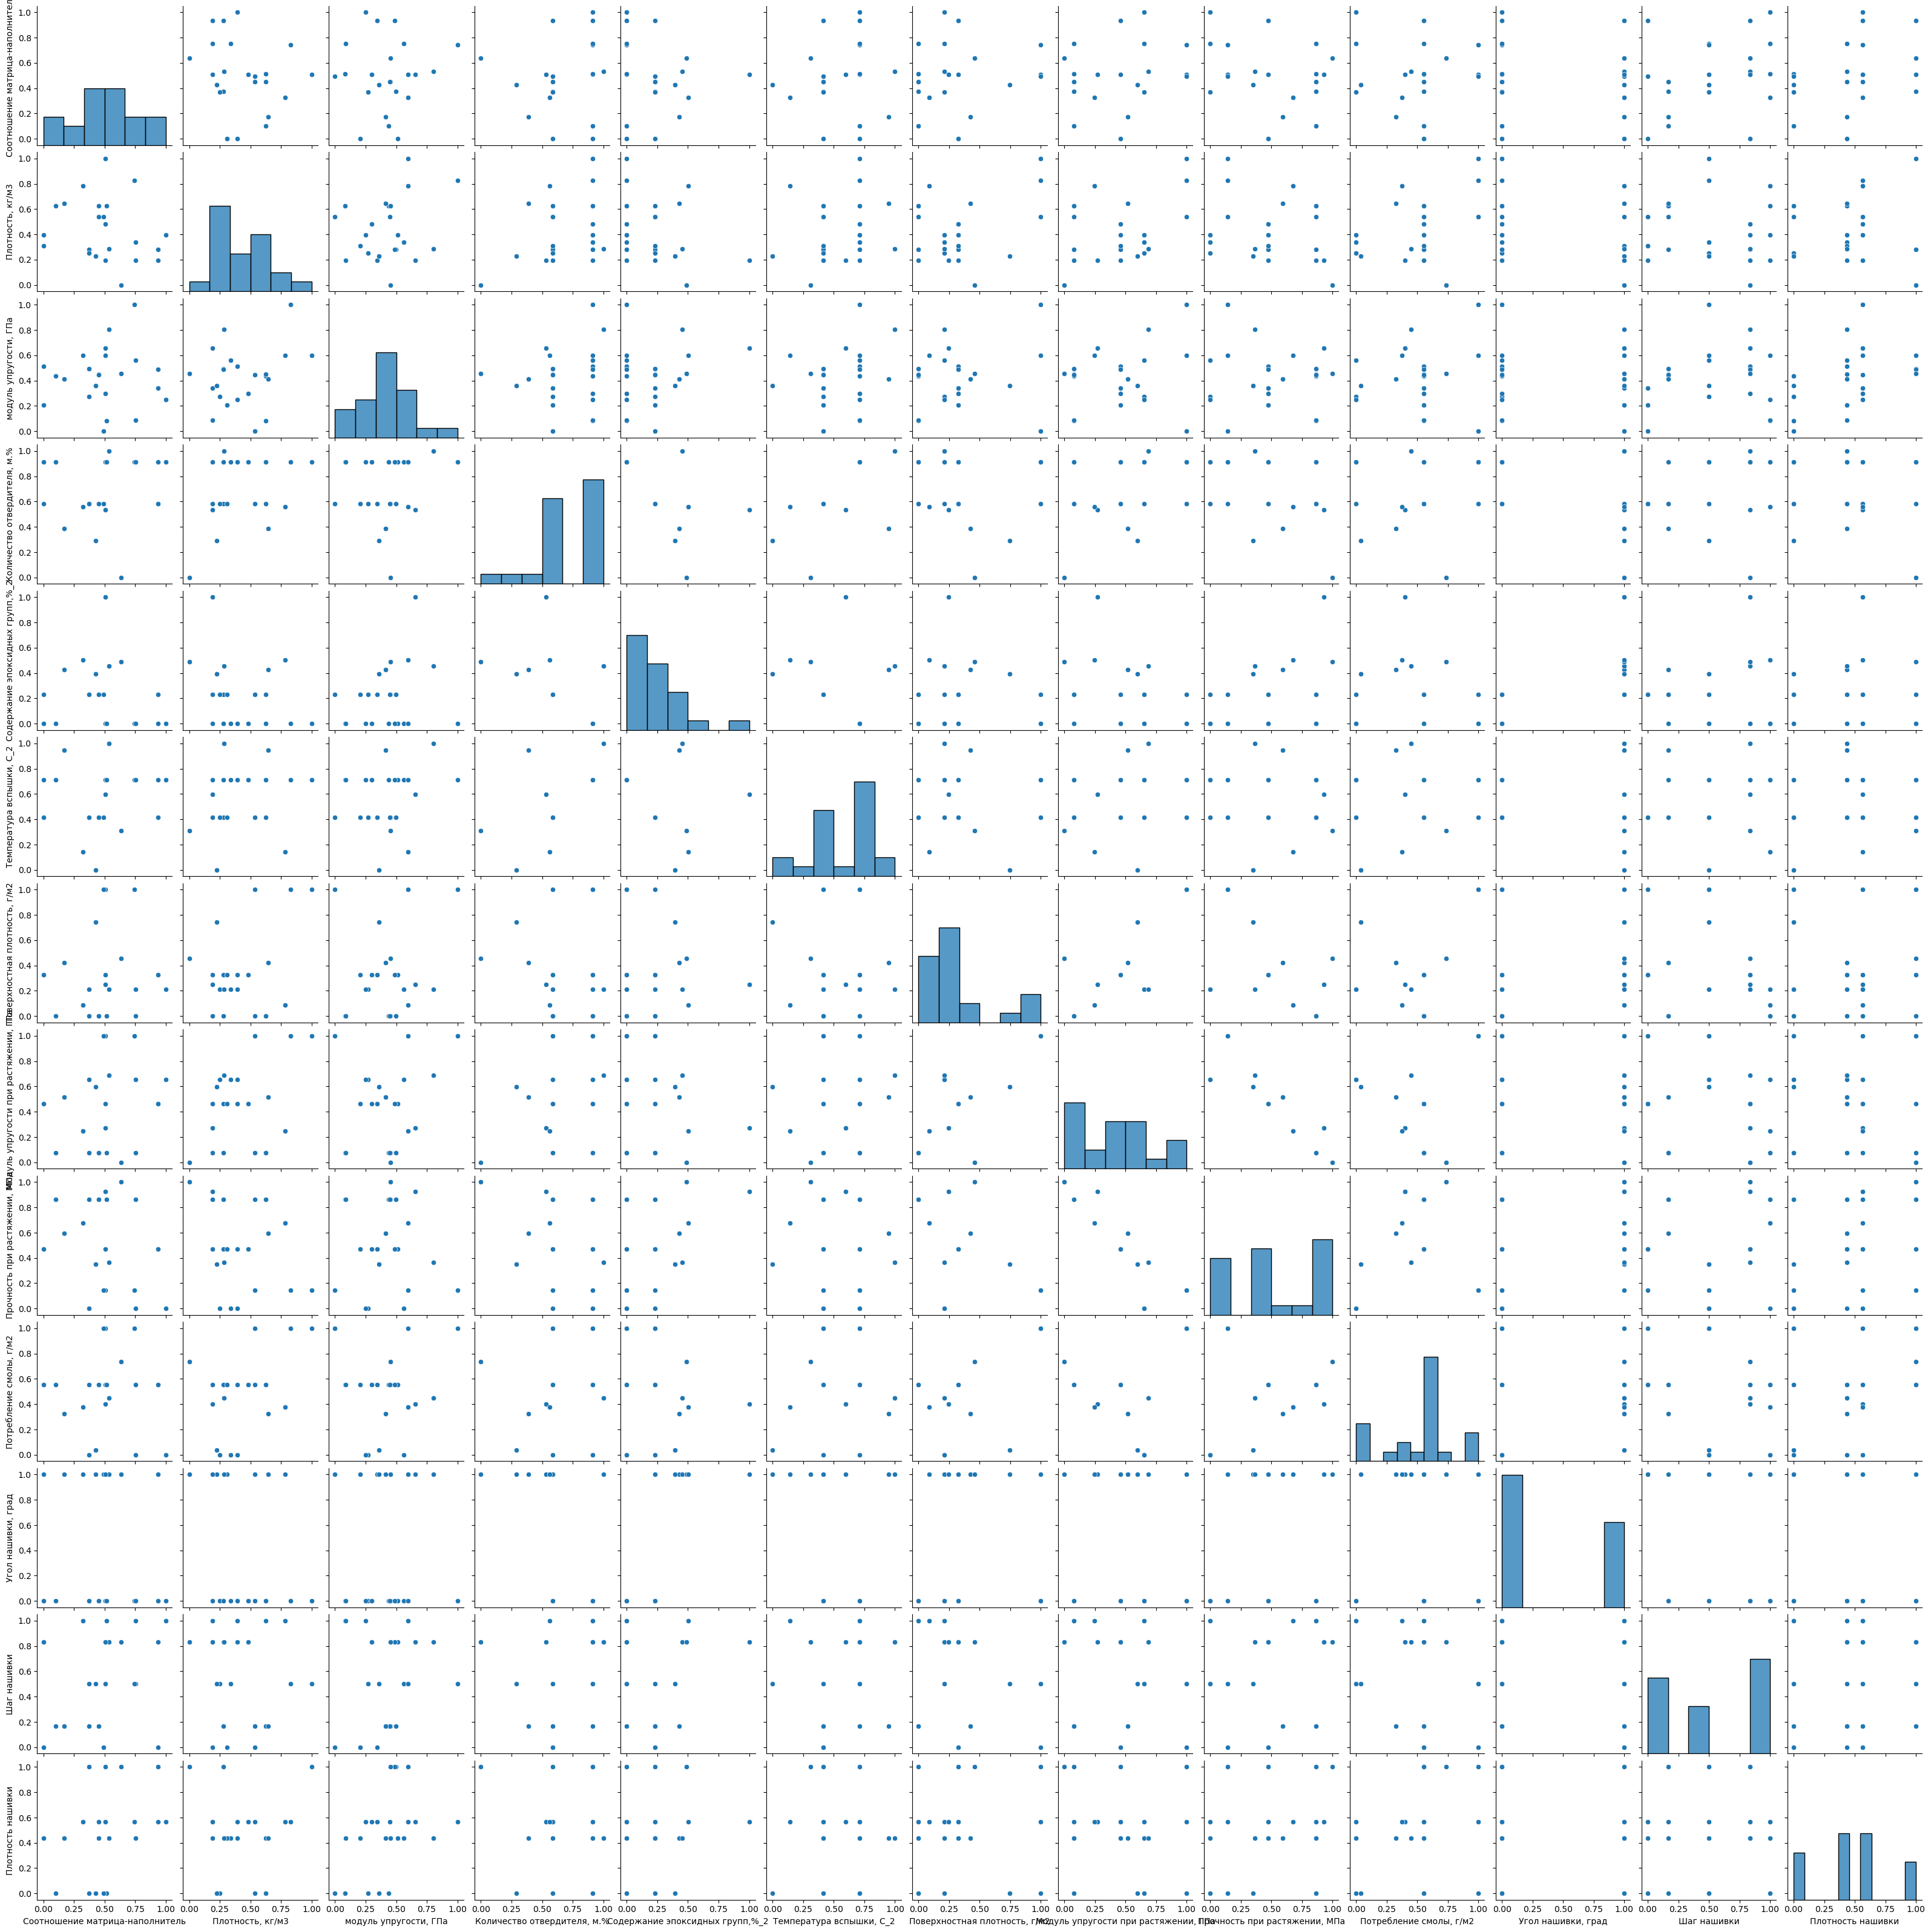

In [47]:
pp4 = sns.pairplot(scaled_df)
pp4.fig.savefig("pairplot_normal.png")

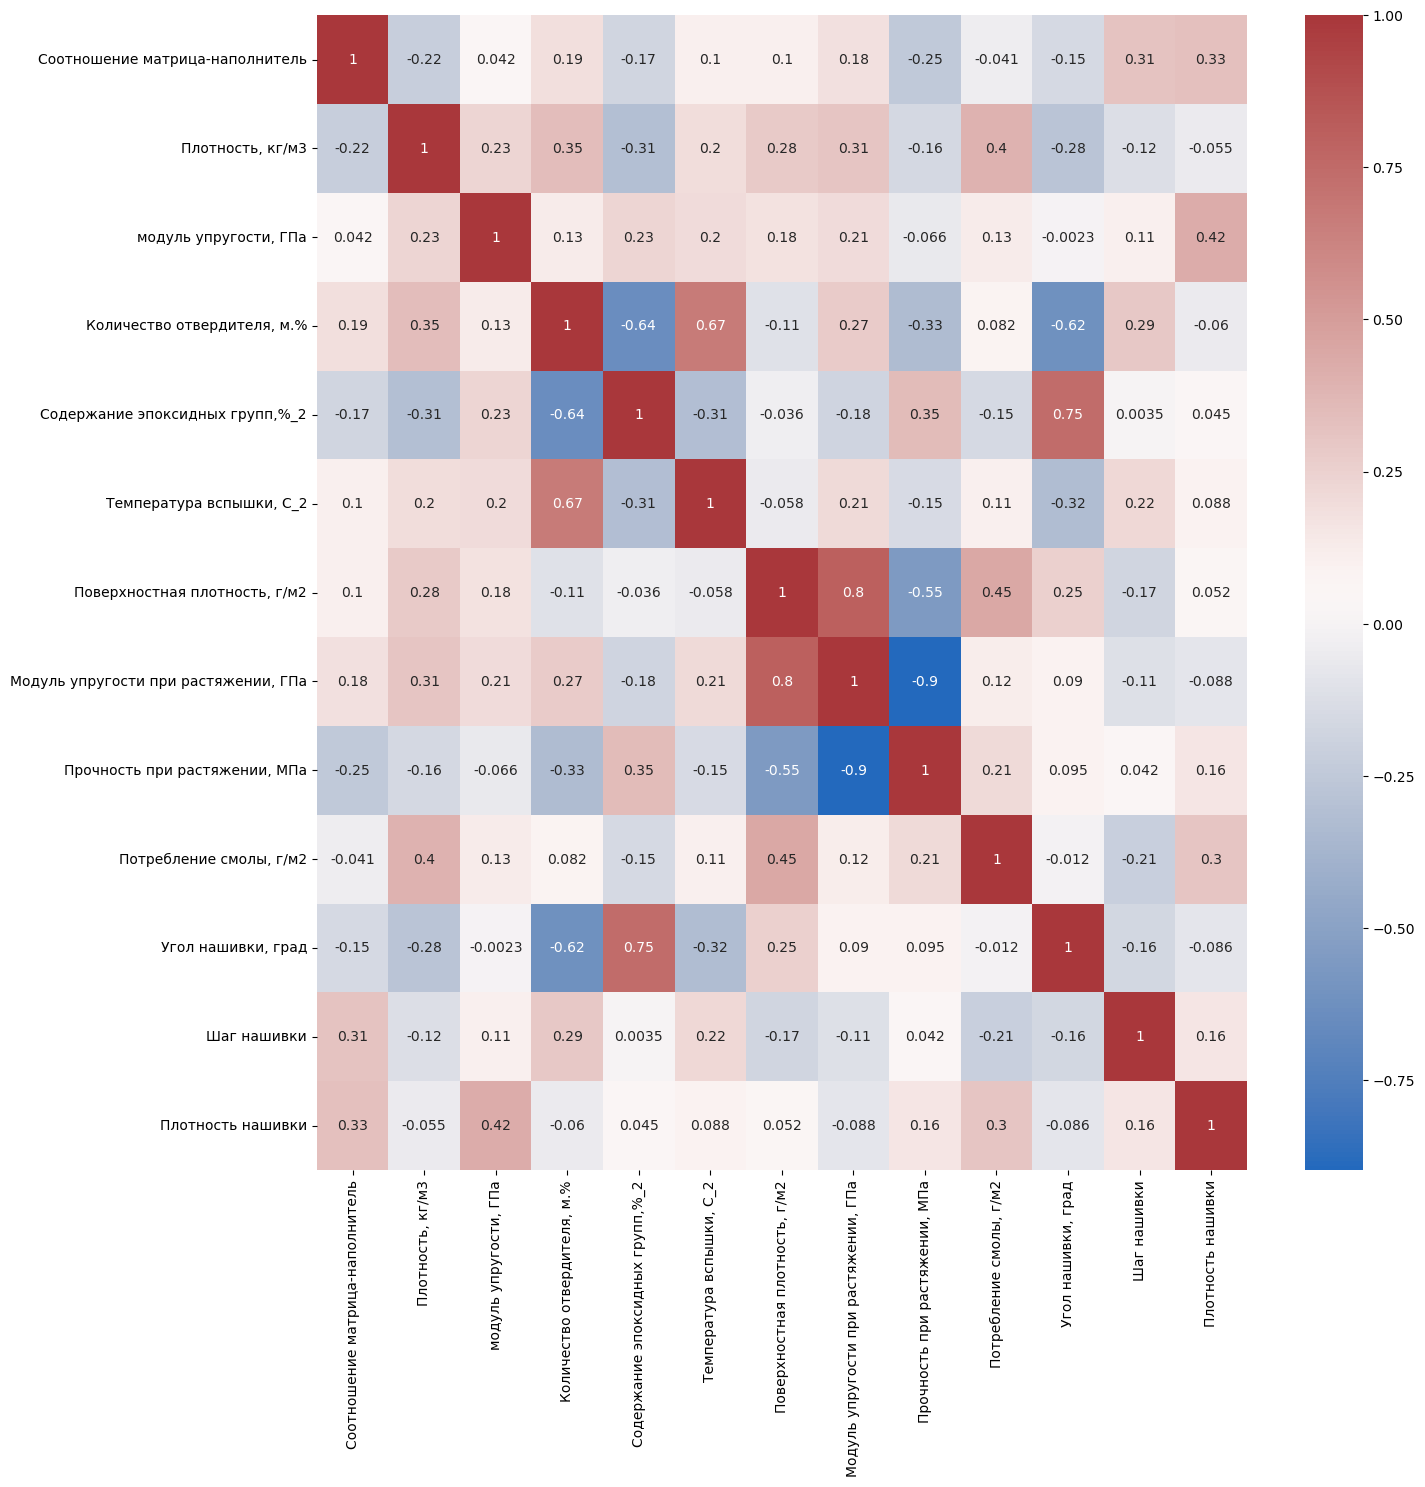

In [48]:
plt.figure(figsize=(15, 15))
hm2 = sns.heatmap(scaled_df.corr(), annot=True, cmap='vlag')
plt.savefig("heatmap_normal.png")

In [50]:
scaled_df.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель        23.0  0.500285  0.276434  0.0   
Плотность, кг/м3                       23.0  0.435870  0.244519  0.0   
модуль упругости, ГПа                  23.0  0.426663  0.230465  0.0   
Количество отвердителя, м.%            23.0  0.695228  0.255668  0.0   
Содержание эпоксидных групп,%_2        23.0  0.212027  0.249852  0.0   
Температура вспышки, С_2               23.0  0.566443  0.240454  0.0   
Поверхностная плотность, г/м2          23.0  0.322893  0.324519  0.0   
Модуль упругости при растяжении, ГПа   23.0  0.436650  0.317998  0.0   
Прочность при растяжении, МПа          23.0  0.517098  0.332839  0.0   
Потребление смолы, г/м2                23.0  0.497227  0.290996  0.0   
Угол нашивки, град                     23.0  0.391304  0.499011  0.0   
Шаг нашивки                            23.0  0.536232  0.365689  0.0   
Плотность нашивки                      23.0  0.478261  0.323242  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.372730  0.507817  0.690384  1.0  
Плотность, кг/м3                      0.264633  0.394403  0.625107  1.0  
модуль упругости, ГПа                 0.284951  0.446546  0.537007  1.0  
Количество отвердителя, м.%           0.584256  0.584256  0.912803  1.0  
Содержание эпоксидных групп,%_2       0.000000  0.229622  0.310997  1.0  
Температура вспышки, С_2              0.416197  0.711831  0.711831  1.0  
Поверхностная плотность, г/м2         0.042644  0.247943  0.373501  1.0  
Модуль упругости при растяжении, ГПа  0.076092  0.461053  0.653534  1.0  
Прочность при растяжении, МПа         0.248163  0.472256  0.864468  1.0  
Потребление смолы, г/м2               0.389035  0.555556  0.555556  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.166667  0.500000  0.833333  1.0  
Плотность нашивки                     0.434783  0.434783  0.565217  1.0

In [21]:
#Экспорт таблицы с признаками и таблиц с целевыми переменными
X = scaled_df.drop(columns=['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'])
X_for_MLP = scaled_df.drop(columns=['Модуль упругости при растяжении, ГПа', 'Соотношение матрица-наполнитель'])
y1 = scaled_df['Модуль упругости при растяжении, ГПа']
y2 = scaled_df['Прочность при растяжении, МПа']
y3 = scaled_df['Соотношение матрица-наполнитель']
X.to_excel('X.xlsx', index=False)
X_for_MLP.to_excel('X_for_MLP.xlsx', index=False)
y1.to_excel('y1.xlsx', index=False)
y2.to_excel('y2.xlsx', index=False)
y3.to_excel('y3.xlsx', index=False)

scaler2 = MinMaxScaler()
Y1_scaler = composite_df['Модуль упругости при растяжении, ГПа']
scaled_data = scaler2.fit_transform(Y1_scaler)
joblib.dump(Y1_scaler, 'Y1_scaler.pkl')

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.